# COVID-19 Outbreak Prediction

The goal of my project is to create a predictive model that can forecast the likelihood of COVID-19 outbreaks in specific regions. I'll be using historical health data along with population data to achieve this. My approach involves collecting and analyzing data on COVID-19 infection data, population density and other population data which I can merge with the infection data. By leveraging machine learning algorithms, I aim to uncover patterns and correlations that will help me make accurate predictions about future outbreaks.

In [1036]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import folium
from geopy.geocoders import Nominatim


# Iteration 0


## Data Provisioning


### Data Collection



Since i want to use data about covid infections and population demographics, i immediately thought about government data since they know everything.
I found a good government dataset with 7 million infections properly tied up in a dataset.

In [1037]:
#read the datasets
infections_df = pd.read_csv('COVID-19_casus_landelijk.csv', delimiter=';')
infections_df

,Version,Date_file,Date_statistics,Date_statistics_type,Agegroup,Sex,Province,Deceased,Week_of_death,Municipal_health_service
0,7,2023-03-31 10:00:00,2021-10-04,DPL,50-59,Male,Zuid-Holland,No,NaN,GGD Haaglanden
1,7,2023-03-31 10:00:00,2021-10-04,DPL,10-19,Male,Zuid-Holland,No,NaN,GGD Haaglanden
2,7,2023-03-31 10:00:00,2021-10-04,DPL,20-29,Male,Groningen,No,NaN,GGD Groningen
3,7,2023-03-31 10:00:00,2021-10-04,DOO,0-9,Male,Noord-Brabant,No,NaN,GGD Hart voor Brabant
4,7,2023-03-31 10:00:00,2021-10-04,DOO,30-39,Female,Zuid-Holland,No,NaN,GGD Hollands-Midden
...,...,...,...,...,...,...,...,...,...,...
6594017,7,2023-03-31 10:00:00,2023-03-31,DPL,10-19,Female,Gelderland,Unknown,NaN,Veiligheids- en Gezondheidsregio Gelderland-Mi...
6594018,7,2023-03-31 10:00:00,2023-03-31,DPL,80-89,Female,Drenthe,Unknown,NaN,GGD Drenthe
6594019,7,2023-03-31 10:00:00,2023-03-31,DPL,50-59,Male,Noord-Brabant,Unknown,NaN,GGD Hart voor Brabant
6594020,7,2023-03-31 10:00:00,2023-03-31,DPL,20-29,Male,Overijssel,Unknown,NaN,GGD IJsselland


Looking in my domain understanding to what factors could be in play in this domain i also needed to find a dataset about population demographics which i fortunately also got from the government.
This set has alot of good features which i can merge with the features of the infection dataset.

In [1038]:
population_df = pd.read_csv('Regionale_kerncijfers_Nederland_24062024_135014.csv', delimiter=';')
population_df.head(10)


,Unnamed: 0,Unnamed: 1,Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking,Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen,Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen,Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|Jonger dan 5 jaar,Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|5 tot 10 jaar,Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|10 tot 15 jaar,Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar,Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar,...,Lokalisering|Lokaliseringen van gemeenten|Arbeidsmarktregio's|Naam,Lokalisering|Lokaliseringen van gemeenten|GGD-regio's|Code,Lokalisering|Lokaliseringen van gemeenten|GGD-regio's|Naam,Lokalisering|Lokaliseringen van gemeenten|Jeugdregio's|Code,Lokalisering|Lokaliseringen van gemeenten|Jeugdregio's|Naam,Lokalisering|Lokaliseringen van gemeenten|Regionale eenheden|Code,Lokalisering|Lokaliseringen van gemeenten|Regionale eenheden|Naam,Lokalisering|Lokaliseringen van gemeenten|Regionale Energiestrategie regio's|Code,Lokalisering|Lokaliseringen van gemeenten|Regionale Energiestrategie regio's|Naam,Lokalisering|Lokaliseringen van gemeenten|Regionale Meld- en Coördinatiepunten|Code
0,Province,Perioden,aantal,aantal,aantal,aantal,aantal,aantal,aantal,aantal,...,naam,code,naam,code,naam,code,naam,code,naam,code
1,Groningen (PV),2021,586937,293361,293576,24951,26757,28966,35274,53110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Groningen (PV),2022,590170,294948,295222,25096,26465,29071,35186,54258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Groningen (PV),2023,596075,297573,298502,25238,26398,29354,35100,55192,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fryslân (PV),2021,651435,326788,324647,30278,33330,37300,40912,38541,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Fryslân (PV),2022,654019,328155,325864,30616,32907,36965,40325,39424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Fryslân (PV),2023,659551,330889,328662,30666,32830,36838,39937,40437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Drenthe (PV),2021,494771,246027,248744,21628,24243,27475,30153,25244,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Drenthe (PV),2022,497743,247702,250041,22019,23995,27292,29686,26113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Drenthe (PV),2023,502051,249640,252411,21895,24080,27338,29272,27262,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now i start removing some of the data which i dont need, since there is alot of data and i need to start filtering some things out. Also I've made the dates to real datetimes so its easier to use.

In [1039]:
# infections_df dataset
infections_df = infections_df.dropna(subset=['Date_statistics'])
infections_df['Date_statistics'] = pd.to_datetime(infections_df['Date_statistics'])
infections_df['Date_statistics'] = infections_df['Date_statistics'].dt.strftime('%Y-%m-%d')
infections_df = infections_df.reset_index()
infections_df = infections_df.rename(columns={'Date_statistics': 'Date'})
infections_df['Date'] = pd.to_datetime(infections_df['Date'])
infections_df = infections_df.set_index('Date')
infections_df = infections_df.sort_index()



In [1040]:

# show the columns
infections_df.columns

Index(['index', 'Version', 'Date_file', 'Date_statistics_type', 'Agegroup',
       'Sex', 'Province', 'Deceased', 'Week_of_death',
       'Municipal_health_service'],
      dtype='object')

Here I chose to remove week of death since i will not be using it for anything. I Would like to keep the deceased column for every outcome. I've explained this in my domain understanding. The Municipal doesnt matter since i'll be using provinces. And for date_statistics ill be using just DPL since this is about a positive lab result. The rest are DON = Date of Notification : Datum waarop de melding bij de GGD is binnengekomen. And DOO = Date of disease onset : Eerste ziektedag zoals gemeld door GGD. Let op: het is niet altijd bekend of deze eerste ziektedag ook echt al Covid-19 betrof.

In [1041]:
# remove index, version, date file, week of death

infections_df = infections_df.drop(columns=['index', 'Version', 'Date_file', 'Week_of_death', 'Municipal_health_service'])
# date_statistics_type just use DPL
infections_df = infections_df[infections_df['Date_statistics_type'] == 'DPL']
infections_df = infections_df.drop(columns=['Date_statistics_type'])

infections_df


,Agegroup,Sex,Province,Deceased
Date,,,,
2021-10-04,50-59,Male,Zuid-Holland,No
2021-10-04,10-19,Male,Zuid-Holland,No
2021-10-04,20-29,Male,Groningen,No
2021-10-04,50-59,Male,Overijssel,No
2021-10-04,10-19,Female,Zuid-Holland,No
...,...,...,...,...
2023-03-31,10-19,Female,Gelderland,Unknown
2023-03-31,80-89,Female,Drenthe,Unknown
2023-03-31,50-59,Male,Noord-Brabant,Unknown


Now I'll quickly check for nan values and remove the data corresponding to these.
As we can see its just a few rows which is good.

In [1042]:
# drop nan values
infections_df = infections_df.dropna()
infections_df


,Agegroup,Sex,Province,Deceased
Date,,,,
2021-10-04,50-59,Male,Zuid-Holland,No
2021-10-04,10-19,Male,Zuid-Holland,No
2021-10-04,20-29,Male,Groningen,No
2021-10-04,50-59,Male,Overijssel,No
2021-10-04,10-19,Female,Zuid-Holland,No
...,...,...,...,...
2023-03-31,10-19,Female,Gelderland,Unknown
2023-03-31,80-89,Female,Drenthe,Unknown
2023-03-31,50-59,Male,Noord-Brabant,Unknown


In [1043]:
# now make seasons , winter, spring, summer, autumn
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'
    

In [1044]:
infections_df

,Agegroup,Sex,Province,Deceased
Date,,,,
2021-10-04,50-59,Male,Zuid-Holland,No
2021-10-04,10-19,Male,Zuid-Holland,No
2021-10-04,20-29,Male,Groningen,No
2021-10-04,50-59,Male,Overijssel,No
2021-10-04,10-19,Female,Zuid-Holland,No
...,...,...,...,...
2023-03-31,10-19,Female,Gelderland,Unknown
2023-03-31,80-89,Female,Drenthe,Unknown
2023-03-31,50-59,Male,Noord-Brabant,Unknown


In [1045]:
# which age groups are there?
infections_df['Agegroup'].unique()
# remove unknown and <50
infections_df = infections_df[infections_df['Agegroup'] != 'Unknown']
infections_df = infections_df[infections_df['Agegroup'] != '<50']
infections_df['Agegroup'].unique()


array(['50-59', '10-19', '20-29', '70-79', '80-89', '40-49', '30-39',
       '0-9', '60-69', '90+'], dtype=object)

I'll be removing the unknown gender from the dataset since this will be unusable in the modelling stage.

In [1046]:
infections_df.shape

(4706720, 4)

In [1047]:
infections_df = infections_df[infections_df['Sex'] != 'Unknown']
infections_df.shape

(4697819, 4)

for the population dataset i'm only using "bevolkingsdichtheid" due to the short period of this project


In [1048]:
population_df.head()


,Unnamed: 0,Unnamed: 1,Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking,Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen,Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen,Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|Jonger dan 5 jaar,Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|5 tot 10 jaar,Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|10 tot 15 jaar,Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar,Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar,...,Lokalisering|Lokaliseringen van gemeenten|Arbeidsmarktregio's|Naam,Lokalisering|Lokaliseringen van gemeenten|GGD-regio's|Code,Lokalisering|Lokaliseringen van gemeenten|GGD-regio's|Naam,Lokalisering|Lokaliseringen van gemeenten|Jeugdregio's|Code,Lokalisering|Lokaliseringen van gemeenten|Jeugdregio's|Naam,Lokalisering|Lokaliseringen van gemeenten|Regionale eenheden|Code,Lokalisering|Lokaliseringen van gemeenten|Regionale eenheden|Naam,Lokalisering|Lokaliseringen van gemeenten|Regionale Energiestrategie regio's|Code,Lokalisering|Lokaliseringen van gemeenten|Regionale Energiestrategie regio's|Naam,Lokalisering|Lokaliseringen van gemeenten|Regionale Meld- en Coördinatiepunten|Code
0,Province,Perioden,aantal,aantal,aantal,aantal,aantal,aantal,aantal,aantal,...,naam,code,naam,code,naam,code,naam,code,naam,code
1,Groningen (PV),2021,586937,293361,293576,24951,26757,28966,35274,53110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Groningen (PV),2022,590170,294948,295222,25096,26465,29071,35186,54258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Groningen (PV),2023,596075,297573,298502,25238,26398,29354,35100,55192,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fryslân (PV),2021,651435,326788,324647,30278,33330,37300,40912,38541,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1049]:
# clean up the population_df dataframe by renaming "Unnamed: 0" to "Province" and renaming "Unnamed: 1" to "Date", Then remove the first row
population_df = population_df.rename(columns={'Unnamed: 1': 'Date'})
population_df = population_df.rename(columns={'Unnamed: 0': 'Province'})
population_df = population_df.rename(columns={'Bevolking|Bevolkingssamenstelling op 1 januari|Bevolkingsdichtheid': 'Bevolkingsdichtheid'})
population_df = population_df.reset_index(drop=True)
#remove the first row
population_df = population_df.drop([0])
population_df = population_df.reset_index(drop=True)

# just use province and bevolkingsdichtheid for the columns
population_df = population_df[['Province', 'Date' , 'Bevolkingsdichtheid']]
population_df['Province'] = population_df['Province'].str.replace('(PV)', '')
population_df

population_df.head()


,Province,Date,Bevolkingsdichtheid
0,Groningen,2021,253
1,Groningen,2022,255
2,Groningen,2023,257
3,Fryslân,2021,195
4,Fryslân,2022,196


In [1050]:
# make date to datetime
population_df['Date'] = pd.to_datetime(population_df['Date'])
population_df = population_df.set_index('Date')
population_df = population_df.sort_index()
#and remove nan values
population_df = population_df.dropna()

population_df


,Province,Bevolkingsdichtheid
Date,,
2021-01-01,Groningen,253
2021-01-01,Zeeland,216
2021-01-01,Noord-Holland,1084
2021-01-01,Utrecht,916
2021-01-01,Gelderland,422
2021-01-01,Zuid-Holland,1380
2021-01-01,Noord-Brabant,525
2021-01-01,Overijssel,351
2021-01-01,Flevoland,303


Now my data is cleaned and filtered from NaN values. I'm ready to continue.

### Data understanding / Preparation

In [1051]:
print(infections_df['Province'].unique())



['Zuid-Holland' 'Groningen' 'Overijssel' 'Noord-Holland' 'Gelderland'
 'Noord-Brabant' 'Fryslân' 'Flevoland' 'Drenthe' 'Limburg' 'Zeeland'
 'Utrecht']


In [1052]:
print(infections_df.columns)
# 

Index(['Agegroup', 'Sex', 'Province', 'Deceased'], dtype='object')


In [1053]:
# create a season based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Unknown'
    
# Create a new column 'Season' based on the 'Month_of_statistics' column
infections_df['Season'] = infections_df.index.month.map(get_season)


In [1054]:
infections_df.columns.unique()

Index(['Agegroup', 'Sex', 'Province', 'Deceased', 'Season'], dtype='object')

now there are only a few columns left which are important features i want to keep.

In [1055]:
infections_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4697819 entries, 2021-10-04 to 2023-03-31
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   Agegroup  object
 1   Sex       object
 2   Province  object
 3   Deceased  object
 4   Season    object
dtypes: object(5)
memory usage: 215.0+ MB


In [1056]:
agegroup_mapping = {
    '0-9': 4.5,
    '10-19': 14.5,
    '20-29': 24.5,
    '30-39': 34.5,
    '40-49': 44.5,
    '50-59': 54.5,
    '60-69': 64.5,
    '70-79': 74.5,
    '80-89': 84.5,
    '90+': 95.0  # Assuming 95 as a representative value for 90+
}

# Map the Agegroup column using the mapping dictionary
infections_df['Agegroup_numerical'] = infections_df['Agegroup'].map(agegroup_mapping)

# Display the updated DataFrame to verify
print(infections_df[['Agegroup', 'Agegroup_numerical']].head(10))

           Agegroup  Agegroup_numerical
Date                                   
2021-10-04    50-59                54.5
2021-10-04    10-19                14.5
2021-10-04    20-29                24.5
2021-10-04    50-59                54.5
2021-10-04    10-19                14.5
2021-10-04    50-59                54.5
2021-10-04    70-79                74.5
2021-10-04    80-89                84.5
2021-10-04    40-49                44.5
2021-10-04    80-89                84.5


In [1057]:
# Mapping for Sex column
sex_mapping = {'Male': 0, 'Female': 1}

# Apply mapping to convert 'Sex' column to numerical values
infections_df['Sex_numerical'] = infections_df['Sex'].map(sex_mapping)

# Checking the modified DataFrame
print(infections_df[['Sex', 'Sex_numerical']])

               Sex  Sex_numerical
Date                             
2021-10-04    Male              0
2021-10-04    Male              0
2021-10-04    Male              0
2021-10-04    Male              0
2021-10-04  Female              1
...            ...            ...
2023-03-31  Female              1
2023-03-31  Female              1
2023-03-31    Male              0
2023-03-31    Male              0
2023-03-31  Female              1

[4697819 rows x 2 columns]


Since the agegroups are unfortunately also objects i must convert these to numerical usable values.

In [1058]:
import pandas as pd

# Assuming infections_df is already defined and loaded with your dataset

# Add a total_reported column where each row is counted as 1
infections_df['total_reported'] = 1

# Verify the changes by printing the first few rows of the DataFrame
print(infections_df.head())


           Agegroup     Sex      Province Deceased  Season  \
Date                                                         
2021-10-04    50-59    Male  Zuid-Holland       No  Autumn   
2021-10-04    10-19    Male  Zuid-Holland       No  Autumn   
2021-10-04    20-29    Male     Groningen       No  Autumn   
2021-10-04    50-59    Male    Overijssel       No  Autumn   
2021-10-04    10-19  Female  Zuid-Holland       No  Autumn   

            Agegroup_numerical  Sex_numerical  total_reported  
Date                                                           
2021-10-04                54.5              0               1  
2021-10-04                14.5              0               1  
2021-10-04                24.5              0               1  
2021-10-04                54.5              0               1  
2021-10-04                14.5              1               1  


In [1059]:
infections_df.head()

,Agegroup,Sex,Province,Deceased,Season,Agegroup_numerical,Sex_numerical,total_reported
Date,,,,,,,,
2021-10-04,50-59,Male,Zuid-Holland,No,Autumn,54.5,0,1
2021-10-04,10-19,Male,Zuid-Holland,No,Autumn,14.5,0,1
2021-10-04,20-29,Male,Groningen,No,Autumn,24.5,0,1
2021-10-04,50-59,Male,Overijssel,No,Autumn,54.5,0,1
2021-10-04,10-19,Female,Zuid-Holland,No,Autumn,14.5,1,1


In [1060]:
# how many infections are there per age group?
infections_per_agegroup = infections_df.groupby('Agegroup').size()
infections_per_agegroup


Agegroup
0-9      295576
10-19    801161
20-29    882866
30-39    844895
40-49    729294
50-59    589314
60-69    318148
70-79    145695
80-89     68148
90+       22722
dtype: int64

In [1061]:
# how many infections are male and how many are female?
infections_per_sex = infections_df.groupby('Sex').size()
infections_per_sex



Sex
Female    2497577
Male      2200242
dtype: int64

In [1062]:
# show the number of infections per province
infections_per_province = infections_df.groupby('Province').size()
print("\nNumber of infections per province:")
print(infections_per_province)



Number of infections per province:
Province
Drenthe           141530
Flevoland          90476
Fryslân           167747
Gelderland        564496
Groningen         167104
Limburg           310951
Noord-Brabant     767457
Noord-Holland     646558
Overijssel        239209
Utrecht           496559
Zeeland            98880
Zuid-Holland     1006852
dtype: int64


In [1063]:
infections_by_province = infections_df.groupby('Province').size().reset_index(name='Infections')

In [1064]:
infections_by_province.head()

,Province,Infections
0,Drenthe,141530
1,Flevoland,90476
2,Fryslân,167747
3,Gelderland,564496
4,Groningen,167104


In [1065]:

# how many infections are there per age group per province?
infections_per_agegroup_province = infections_df.groupby(['Agegroup', 'Province']).size()
infections_per_agegroup_province

Agegroup  Province     
0-9       Drenthe           9416
          Flevoland         3340
          Fryslân           5109
          Gelderland       29908
          Groningen         9385
                           ...  
90+       Noord-Holland     2968
          Overijssel         648
          Utrecht           2133
          Zeeland            718
          Zuid-Holland      4865
Length: 120, dtype: int64

In [1066]:
# how many infections are there per month per year?
infections_per_month_year = infections_df.groupby([infections_df.index.month, infections_df.index.year]).size()
infections_per_month_year




Date  Date
1     2022    1231125
      2023      11693
2     2022    1371076
      2023      14435
3     2022    1230838
      2023      11497
4     2022     116236
5     2022      15842
6     2022      75409
7     2022     117459
8     2022      27622
9     2022      41162
10    2021      21213
      2022      75894
11    2021     159724
      2022      22860
12    2021     130464
      2022      23270
dtype: int64

In [1067]:
# how many infections are there per age group per month per year?
infections_per_agegroup_month_year = infections_df.groupby(['Agegroup', infections_df.index.month, infections_df.index.year]).size()
infections_per_agegroup_month_year

Agegroup  Date  Date
0-9       1     2022    118878
                2023       270
          2     2022     85689
                2023       336
          3     2022     39378
                         ...  
90+       10    2022      1607
          11    2021      2078
                2022       526
          12    2021      1243
                2022      1005
Length: 180, dtype: int64

In [1068]:
# how many infections are there per province per month per year?
infections_per_province_month_year = infections_df.groupby(['Province', infections_df.index.month, infections_df.index.year]).size()
infections_per_province_month_year


Province      Date  Date
Drenthe       1     2022    18920
                    2023      404
              2     2022    50720
                    2023      322
              3     2022    50048
                            ...  
Zuid-Holland  10    2022    14876
              11    2021    32204
                    2022     4823
              12    2021    33331
                    2022     4924
Length: 216, dtype: int64

In [1069]:

# how many infections are there per age group per province per month per year?
infections_per_agegroup_province_month_year = infections_df.groupby(['Agegroup', 'Province', infections_df.index.month, infections_df.index.year]).size()
infections_per_agegroup_province_month_year


Agegroup  Province      Date  Date
0-9       Drenthe       1     2022    2373
                              2023       6
                        2     2022    3970
                              2023       8
                        3     2022    2041
                                      ... 
90+       Zuid-Holland  10    2022     354
                        11    2021     464
                              2022     130
                        12    2021     263
                              2022     230
Length: 2160, dtype: int64

In [1070]:
infections_df

,Agegroup,Sex,Province,Deceased,Season,Agegroup_numerical,Sex_numerical,total_reported
Date,,,,,,,,
2021-10-04,50-59,Male,Zuid-Holland,No,Autumn,54.5,0,1
2021-10-04,10-19,Male,Zuid-Holland,No,Autumn,14.5,0,1
2021-10-04,20-29,Male,Groningen,No,Autumn,24.5,0,1
2021-10-04,50-59,Male,Overijssel,No,Autumn,54.5,0,1
2021-10-04,10-19,Female,Zuid-Holland,No,Autumn,14.5,1,1
...,...,...,...,...,...,...,...,...
2023-03-31,10-19,Female,Gelderland,Unknown,Spring,14.5,1,1
2023-03-31,80-89,Female,Drenthe,Unknown,Spring,84.5,1,1
2023-03-31,50-59,Male,Noord-Brabant,Unknown,Spring,54.5,0,1


Here i start splitting the data up, in order to get an overview of infection rates, infection hotspots, etc.


In [1071]:
infections_df

,Agegroup,Sex,Province,Deceased,Season,Agegroup_numerical,Sex_numerical,total_reported
Date,,,,,,,,
2021-10-04,50-59,Male,Zuid-Holland,No,Autumn,54.5,0,1
2021-10-04,10-19,Male,Zuid-Holland,No,Autumn,14.5,0,1
2021-10-04,20-29,Male,Groningen,No,Autumn,24.5,0,1
2021-10-04,50-59,Male,Overijssel,No,Autumn,54.5,0,1
2021-10-04,10-19,Female,Zuid-Holland,No,Autumn,14.5,1,1
...,...,...,...,...,...,...,...,...
2023-03-31,10-19,Female,Gelderland,Unknown,Spring,14.5,1,1
2023-03-31,80-89,Female,Drenthe,Unknown,Spring,84.5,1,1
2023-03-31,50-59,Male,Noord-Brabant,Unknown,Spring,54.5,0,1


Checking if the data is properly aggregated to create boxplot visualisations

Data Types:
Agegroup_numerical    float64
Sex_numerical           int64
total_reported          int64
dtype: object

Missing Values:
Agegroup_numerical    0
Sex_numerical         0
total_reported        0
dtype: int64

Aggregated Data Structure:
   Agegroup_numerical  Sex_numerical  total_reported
0                 4.5              0          151384
1                 4.5              1          144192
2                14.5              0          388308
3                14.5              1          412853
4                24.5              0          400535

Summary Statistics of total_reported:
count        20.000000
mean     234890.950000
std      165594.856528
min        6573.000000
25%       74328.750000
50%      220194.000000
75%      391364.750000
max      482331.000000
Name: total_reported, dtype: float64


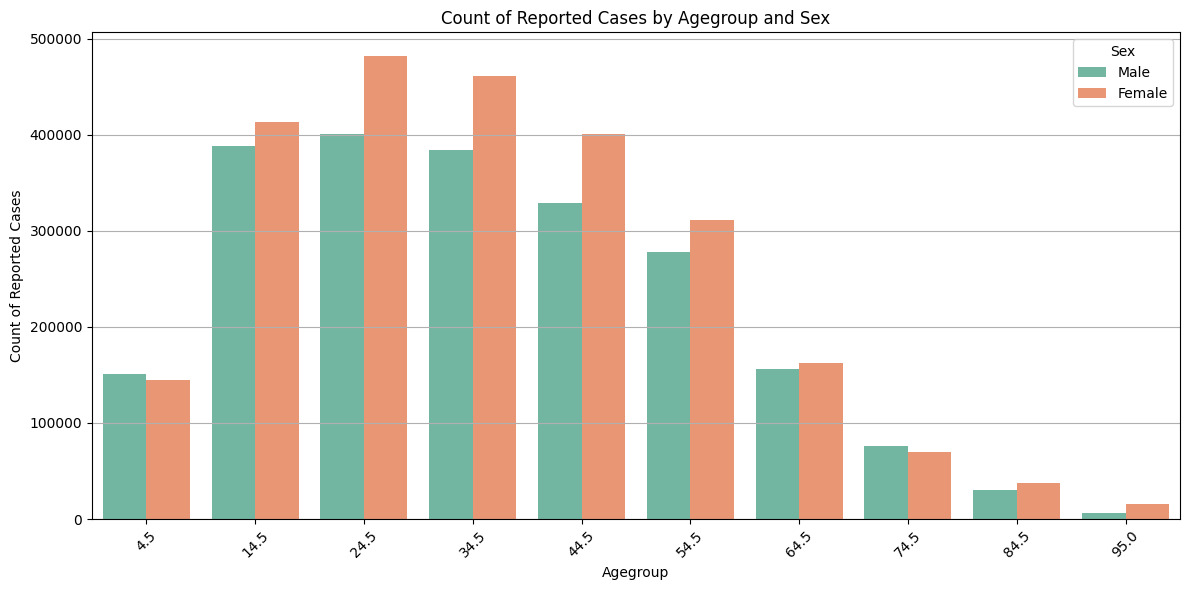

In [1072]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming infections_df is already defined and loaded with the updated columns

# Check data types and missing values
print("Data Types:")
print(infections_df[['Agegroup_numerical', 'Sex_numerical', 'total_reported']].dtypes)
print("\nMissing Values:")
print(infections_df[['Agegroup_numerical', 'Sex_numerical', 'total_reported']].isnull().sum())

# Aggregate total reported cases by Agegroup_numerical and Sex_numerical
aggregated_df = infections_df.groupby(['Agegroup_numerical', 'Sex_numerical'])['total_reported'].sum().reset_index()

# Check the structure of aggregated data
print("\nAggregated Data Structure:")
print(aggregated_df.head())

# Check summary statistics of total_reported
print("\nSummary Statistics of total_reported:")
print(aggregated_df['total_reported'].describe())

# Plot a simple countplot to visualize distribution by Agegroup and Sex
plt.figure(figsize=(12, 6))
sns.countplot(x='Agegroup_numerical', hue='Sex_numerical', data=infections_df, palette='Set2')
plt.title('Count of Reported Cases by Agegroup and Sex')
plt.xlabel('Agegroup')
plt.ylabel('Count of Reported Cases')
plt.legend(title='Sex', labels=['Male', 'Female'])
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Everything looks good. Let's create the boxplots to visually understand how COVID-19 cases are distributed across different age groups and sexes. Boxplots are great for this because they show us at a glance where most cases fall within each group, how spread out the data is, and if there are any unusual values that might need closer attention.

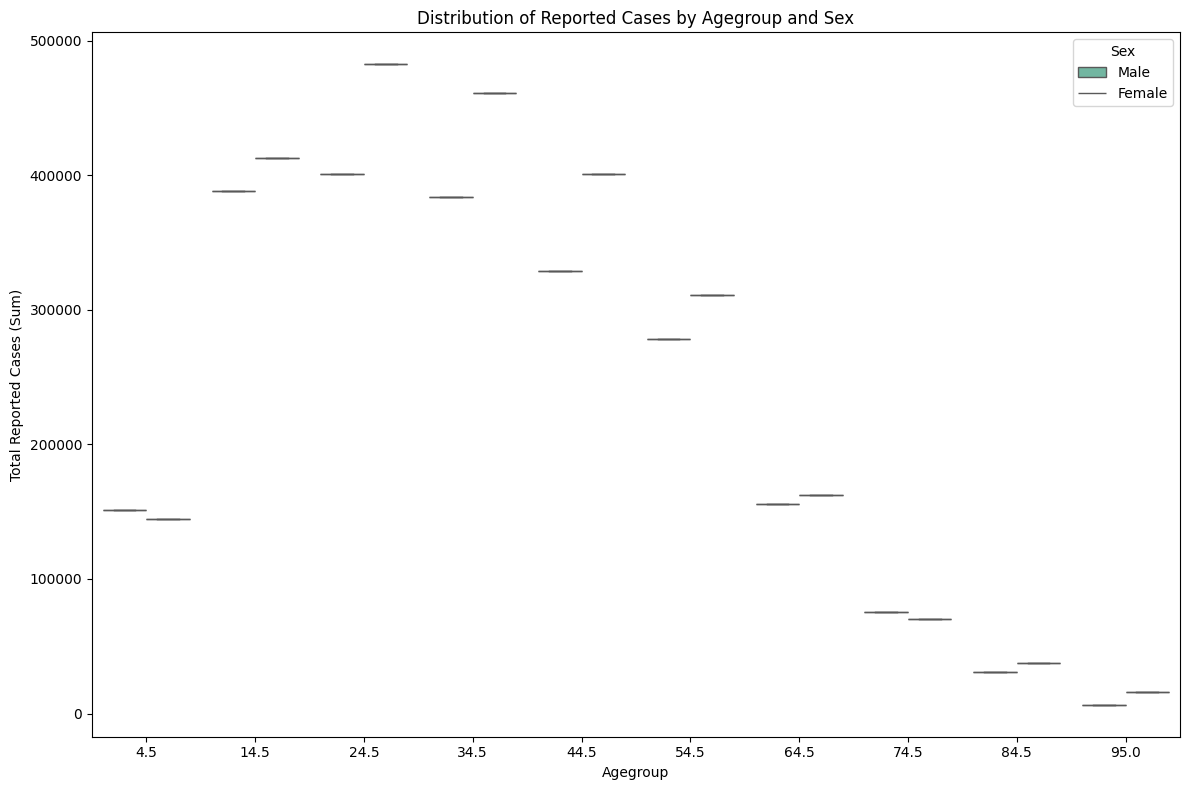

In [1073]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'aggregated_df' is already defined and contains aggregated data

# Create boxplot with adjusted settings
plt.figure(figsize=(12, 8))
sns.boxplot(x='Agegroup_numerical', y='total_reported', hue='Sex_numerical', data=aggregated_df, palette='Set2', showfliers=False, whis=[5, 95])
plt.title('Distribution of Reported Cases by Agegroup and Sex')
plt.xlabel('Agegroup')
plt.ylabel('Total Reported Cases (Sum)')

# Customize legend
plt.legend(title='Sex', labels=['Male', 'Female'])

plt.tight_layout()
plt.show()


The distribution of reported cases varies significantly across different age groups. For example, some age groups show a wider spread of reported cases (larger IQR), indicating higher variability, while others may have more consistent reporting.

There appears to be some variation in reported cases between sexes, as indicated by differences in the medians and spread (IQR) between categories.



Now that all our values are the way they need to be, we can start visualizing some of the data


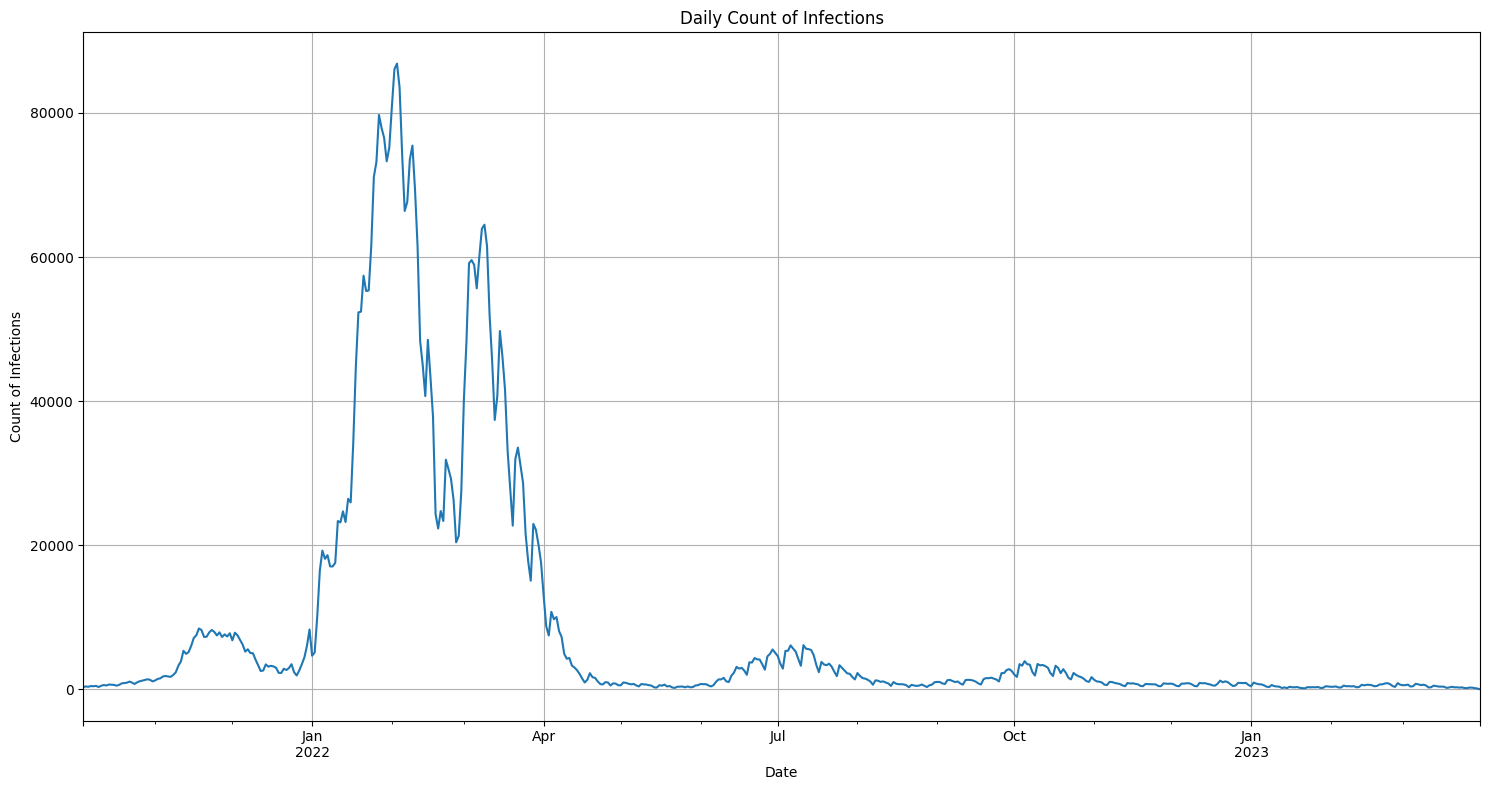

In [1074]:

# Plot showing the daily count of infections over time
plt.figure(figsize=(15, 8))
infections_df['Amount_of_infections_df'] = 1
infections_df['Amount_of_infections_df'].resample('D').sum().plot()
plt.title('Daily Count of Infections')
plt.xlabel('Date')
plt.ylabel('Count of Infections')
plt.grid(True)
plt.tight_layout()
plt.show()


           Agegroup     Sex      Province Deceased  Season  \
Date                                                         
2021-10-04    50-59    Male  Zuid-Holland       No  Autumn   
2021-10-04    10-19    Male  Zuid-Holland       No  Autumn   
2021-10-04    20-29    Male     Groningen       No  Autumn   
2021-10-04    50-59    Male    Overijssel       No  Autumn   
2021-10-04    10-19  Female  Zuid-Holland       No  Autumn   

            Agegroup_numerical  Sex_numerical  total_reported  \
Date                                                            
2021-10-04                54.5              0               1   
2021-10-04                14.5              0               1   
2021-10-04                24.5              0               1   
2021-10-04                54.5              0               1   
2021-10-04                14.5              1               1   

            Amount_of_infections_df  
Date                                 
2021-10-04                       

C:\Users\Camil\AppData\Local\Temp\ipykernel_4116\3319028861.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Province', data=infections_df, order=infections_df['Province'].value_counts().index, palette='viridis', ax=axs[1, 2])
C:\Users\Camil\AppData\Local\Temp\ipykernel_4116\3319028861.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Agegroup', data=infections_df, order=infections_df['Agegroup'].value_counts().index, palette='mako', ax=axs[2, 0])
C:\Users\Camil\AppData\Local\Temp\ipykernel_4116\3319028861.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` f

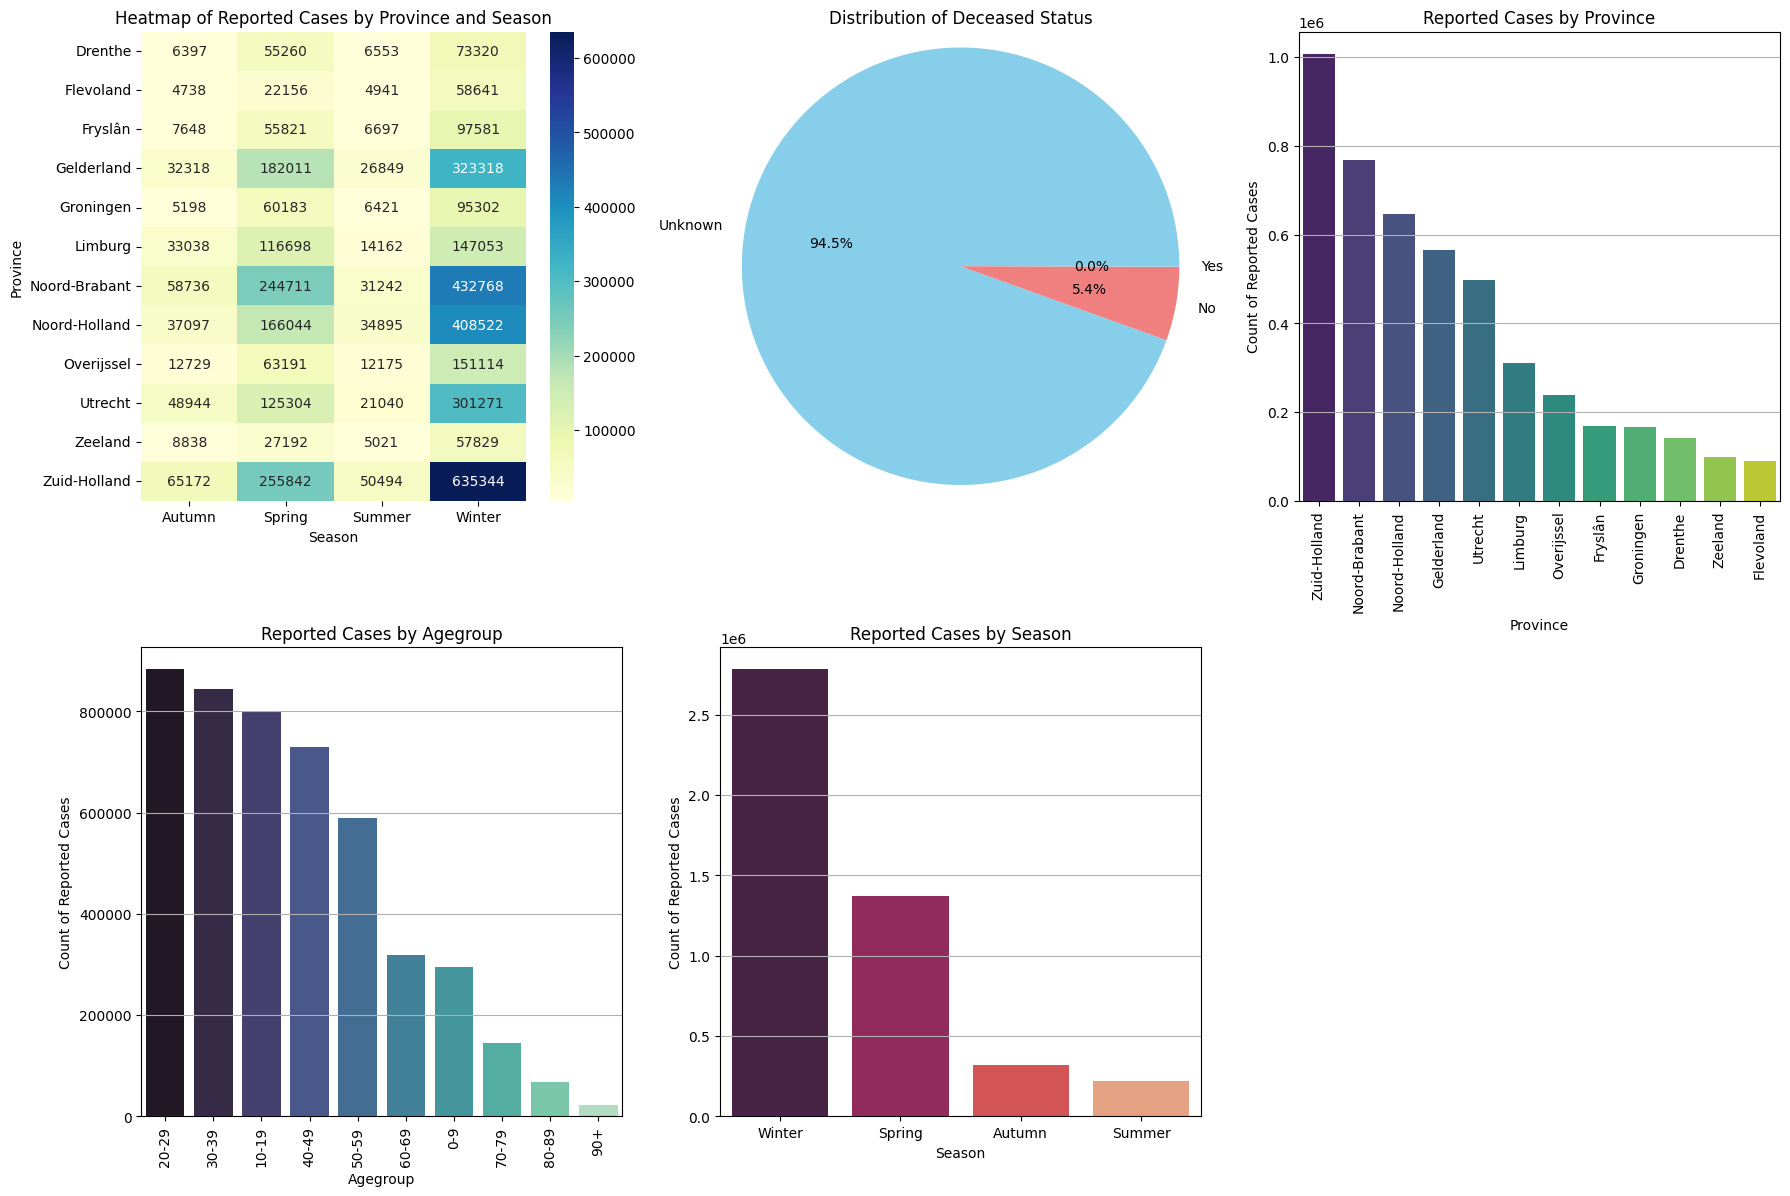

In [1075]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check the dataframe
print(infections_df.head())

# Ensure Agegroup_numerical and Sex_numerical are numeric
infections_df['Agegroup_numerical'] = pd.to_numeric(infections_df['Agegroup_numerical'], errors='coerce')
infections_df['Sex_numerical'] = pd.to_numeric(infections_df['Sex_numerical'], errors='coerce')
infections_df['total_reported'] = pd.to_numeric(infections_df['total_reported'], errors='coerce')

# Create subplots with specified layout
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))



# Heatmap for Province and Season distribution
province_season_pivot = infections_df.pivot_table(index='Province', columns='Season', values='total_reported', aggfunc='sum')
sns.heatmap(province_season_pivot, annot=True, cmap='YlGnBu', fmt='.0f', ax=axs[1, 0])
axs[1, 0].set_title('Heatmap of Reported Cases by Province and Season')
axs[1, 0].set_xlabel('Season')
axs[1, 0].set_ylabel('Province')

# Pie chart for deceased status
deceased_counts = infections_df['Deceased'].value_counts()
axs[1, 1].pie(deceased_counts, labels=deceased_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
axs[1, 1].set_title('Distribution of Deceased Status')
axs[1, 1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle


# Count plot for infections per Province
sns.countplot(x='Province', data=infections_df, order=infections_df['Province'].value_counts().index, palette='viridis', ax=axs[1, 2])
axs[1, 2].set_title('Reported Cases by Province')
axs[1, 2].set_xlabel('Province')
axs[1, 2].set_ylabel('Count of Reported Cases')
axs[1, 2].tick_params(axis='x', rotation=90)
axs[1, 2].grid(axis='y')

# Count plot for infections per Agegroup
sns.countplot(x='Agegroup', data=infections_df, order=infections_df['Agegroup'].value_counts().index, palette='mako', ax=axs[2, 0])
axs[2, 0].set_title('Reported Cases by Agegroup')
axs[2, 0].set_xlabel('Agegroup')
axs[2, 0].set_ylabel('Count of Reported Cases')
axs[2, 0].tick_params(axis='x', rotation=90)
axs[2, 0].grid(axis='y')

# Count plot for infections per Season
sns.countplot(x='Season', data=infections_df, order=infections_df['Season'].value_counts().index, palette='rocket', ax=axs[2, 1])
axs[2, 1].set_title('Reported Cases by Season')
axs[2, 1].set_xlabel('Season')
axs[2, 1].set_ylabel('Count of Reported Cases')
axs[2, 1].grid(axis='y')

# remove the top 3 empty plots
fig.delaxes(axs[0, 0])
fig.delaxes(axs[0, 1])
fig.delaxes(axs[0, 2])
fig.delaxes(axs[2, 2])

# Adjust layout and show plot
plt.tight_layout()
plt.show()


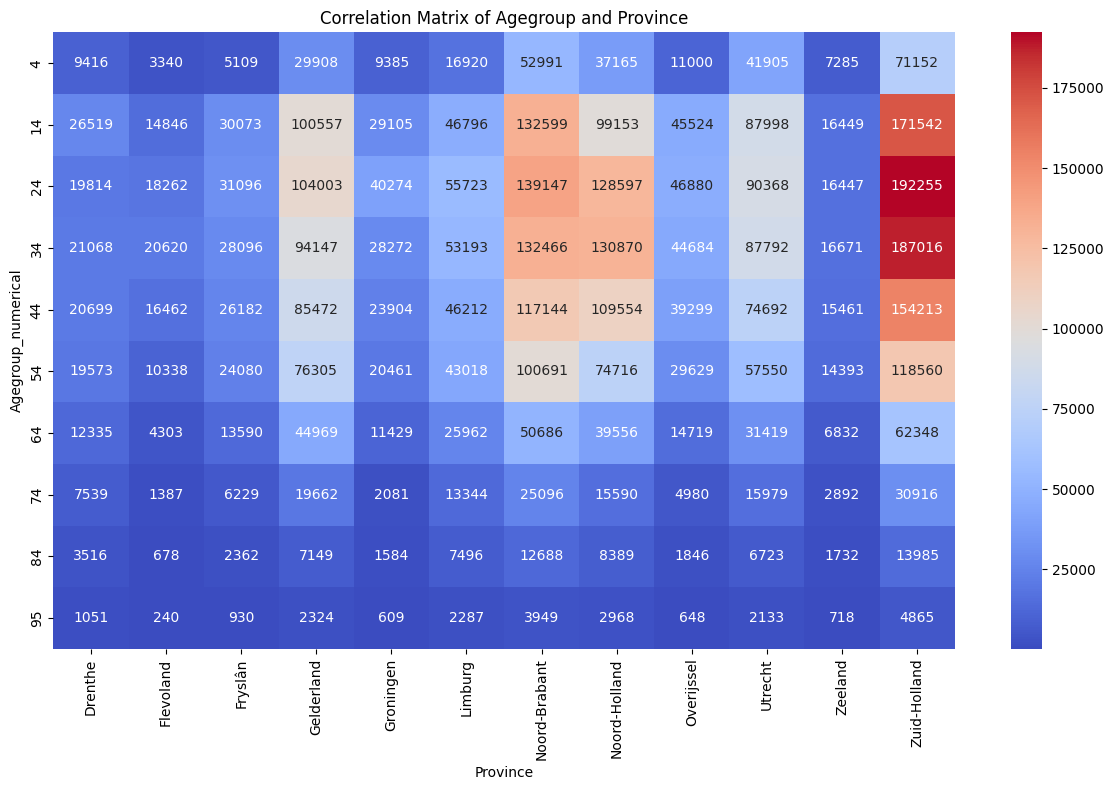

In [1076]:
# create a pivot table
infections_df['Amount_of_infections_df'] = 1
infections_df['Amount_of_infections_df'] = infections_df['Amount_of_infections_df'].astype(int)
infections_df['Agegroup_numerical'] = infections_df['Agegroup_numerical'].astype(int)
infections_df
pivot_table_agegroup_province = infections_df.pivot_table(index='Agegroup_numerical', columns='Province', values='Amount_of_infections_df', aggfunc='sum')
pivot_table_agegroup_province
# now make the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_agegroup_province, annot=True, cmap='coolwarm', fmt='.0f')
plt.title('Correlation Matrix of Agegroup and Province')
plt.tight_layout()


In [1077]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap

# Coordinates of Dutch provinces
province_coords = {
    "Drenthe": (52.9474, 6.6238),
    "Flevoland": (52.527978, 5.595350),
    "Fryslân": (53.1642, 5.7818),
    "Gelderland": (52.0459, 5.8716),
    "Groningen": (53.2194, 6.5665),
    "Limburg": (51.2194, 5.9398),
    "Noord-Brabant": (51.4827, 5.2328),
    "Noord-Holland": (52.5200, 4.7500),
    "Overijssel": (52.4451, 6.5017),
    "Utrecht": (52.0911, 5.1222),
    "Zeeland": (51.4416, 3.7678),
    "Zuid-Holland": (51.9200, 4.4800)
}

# Add Latitude and Longitude columns based on the province_coords dictionary
infections_by_province['Latitude'] = infections_by_province['Province'].map(lambda p: province_coords[p][0] if p in province_coords else None)
infections_by_province['Longitude'] = infections_by_province['Province'].map(lambda p: province_coords[p][1] if p in province_coords else None)

# Display the updated dataframe
print("\nInfections by Province with Coordinates:")
print(infections_by_province)


# Create a map centered on the Netherlands
map = folium.Map(location=[52.1326, 5.2913], zoom_start=7)

# Add a heatmap to the map
HeatMap(data=infections_by_province[['Latitude', 'Longitude', 'Infections']], radius=60).add_to(map)

# Save and display the map
map.save('infections_heatmap.html')
map



Infections by Province with Coordinates:
         Province  Infections   Latitude  Longitude
0         Drenthe      141530  52.947400    6.62380
1       Flevoland       90476  52.527978    5.59535
2         Fryslân      167747  53.164200    5.78180
3      Gelderland      564496  52.045900    5.87160
4       Groningen      167104  53.219400    6.56650
5         Limburg      310951  51.219400    5.93980
6   Noord-Brabant      767457  51.482700    5.23280
7   Noord-Holland      646558  52.520000    4.75000
8      Overijssel      239209  52.445100    6.50170
9         Utrecht      496559  52.091100    5.12220
10        Zeeland       98880  51.441600    3.76780
11   Zuid-Holland     1006852  51.920000    4.48000


## Preprocessing Modelling


### Why Clustering?
Clustering is a fundamental unsupervised learning technique that groups similar data points together based on their features. This approach is particularly valuable for exploratory data analysis, where the objective is to uncover hidden patterns and structures in the data without relying on predefined labels. Here’s a deeper dive into why clustering is suited for this task:

1.	Unsupervised Learning: Since clustering doesn’t require labeled data, it’s ideal for scenarios where outbreak labels are not well-defined initially. This allows for an exploratory approach to understand the data’s natural groupings.

2.	Pattern Recognition: By identifying regions with similar outbreak patterns, clustering can help in recognizing and categorizing different outbreak dynamics, which is crucial for targeted public health interventions.

3.	Anomaly Detection: Clusters can highlight outliers or anomalies that may indicate emerging outbreaks or regions requiring closer surveillance.




## What Models and why?

When analyzing COVID-19 outbreak patterns, the choice of clustering models—K-means, DBSCAN, and hierarchical clustering—offers unique advantages tailored to the specific nuances of the pandemic.

### K-means Clustering
First up is K-means clustering. Think of it as sorting your collection of colored marbles into different jars. K-means divides the dataset into K clusters, where each data point belongs to the cluster with the closest mean, or centroid. This model is ideal for identifying clusters of regions with similar COVID-19 outbreak patterns. By pinpointing distinct groupings, you can understand how different areas are experiencing the pandemic in similar ways, which can be crucial for targeted interventions.


K-means clustering is like sorting your data into different groups based on similarities. It partitions the dataset into K clusters, where each data point belongs to the cluster with the nearest mean (centroid). This model is particularly useful for:

Identifying Clusters of Regions with Similar Outbreak Patterns: By grouping regions with similar COVID-19 trends, you can easily identify areas experiencing the pandemic in comparable ways.
Understanding Outbreak Levels and Trends: Distinct groupings can correspond to different levels or trends of outbreaks, helping in understanding how the pandemic evolves in different areas.


### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
Next, we have DBSCAN, or Density-Based Spatial Clustering of Applications with Noise. Imagine walking through a crowded market and noting where people naturally gather and where there are fewer individuals. DBSCAN groups closely packed points and marks points in low-density regions as outliers. This method is particularly effective for detecting spatial clusters and noise in infection rates. It helps identify high-density clusters of infections—potential hotspots—and outliers, which might be emerging outbreaks or data errors.

DBSCAN works like a magnifying glass, highlighting densely packed areas and marking isolated points as outliers. It’s great for:

Detecting Spatial Clusters and Noise: This model excels at identifying clusters of infections that are closely packed, which can indicate potential hotspots.
Highlighting Anomalies: It marks points in low-density regions as outliers, helping to spot potential emerging outbreaks or errors in the data.

### Hierarchical Clustering
Lastly, there's hierarchical clustering. Picture a family tree that shows how small families combine into larger branches. Hierarchical clustering builds a tree of clusters, which can be agglomerative (starting with individual points and merging them) or divisive (starting with one large cluster and splitting it). This model is useful for understanding nested clusters of infections, illustrating how smaller clusters merge into larger ones. It provides a detailed view of how regions group together at different levels of granularity, revealing the hierarchical structure of outbreaks.


Hierarchical clustering builds a tree-like structure (dendrogram) of clusters, offering a detailed view of how data points group together. This model is beneficial for:

Understanding Nested Clusters: It shows how smaller clusters merge into larger ones, providing a multi-level perspective on how infections spread.
Detailed Granularity: The hierarchical nature of this method helps understand the structure of outbreaks at different levels, from small clusters to large groups.
Why These Models Are Good for Analyzing COVID-19 Outbreak Patterns

Exploratory Analysis Without Labels: Since the models work without predefined labels, they are ideal for uncovering natural groupings and patterns in the data.
Targeted Public Health Interventions: By understanding how different regions experience the pandemic, public health officials can design more effective, targeted interventions.
Early Detection of Hotspots and Outliers: These models help in identifying both high-density infection clusters and anomalies, enabling early action to prevent widespread outbreaks.
Hierarchical Understanding: The multi-level insights provided by hierarchical clustering can inform strategies at both local and broader scales

In [1078]:
infections_df.shape

(4697819, 9)

## Initial Clustering Models

We begin by exploring three prominent clustering algorithms:

### 1. K-means Clustering:

Purpose: Partition the dataset into K clusters based on similarity of COVID-19 outbreak patterns.

Insight: Identify groups of regions with comparable outbreak levels or trends.




### 2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise):


Purpose: Detect spatial clusters of infections and potential outliers (emerging outbreaks or data anomalies).

Insight: Highlight high-density clusters (hotspots) and areas with unusual infection rates.


### 3. Hierarchical Clustering:

Purpose: Construct a dendrogram to show nested clusters of infections.

Insight: Reveal hierarchical structures in outbreak patterns, from local clusters to broader regional patterns.

## Conclusion

I have tried modelling with the dataset but 5 million rows (infections) is undoable, so i'll be taking somewhere around 20.000 random infections and seeing if the visualisation / correlation results will be the same.

If so ill be modelling with a smaller dataframe (randominfections_df).

Since the data is already cleaned and processed i can just take the samples from the infections_df.

# Iteration 1


# COVID-19 Outbreak Prediction

The goal of my project is to create a predictive model that can forecast the likelihood of COVID-19 outbreaks in specific regions. I'll be using historical health data along with population data to achieve this. My approach involves collecting and analyzing data on COVID-19 infection data, population density and other population data which I can merge with the infection data. By leveraging machine learning algorithms, I aim to uncover patterns and correlations that will help me make accurate predictions about future outbreaks.

In [1079]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import folium
from geopy.geocoders import Nominatim


## Data Provisioning


### Data Collection



Since i want to use data about covid infections and population demographics, i immediately thought about government data since they know everything.
I found a good government dataset with 7 million infections properly tied up in a dataset.

In [1080]:
#read the datasets
infections_df = pd.read_csv('COVID-19_casus_landelijk.csv', delimiter=';')
infections_df

,Version,Date_file,Date_statistics,Date_statistics_type,Agegroup,Sex,Province,Deceased,Week_of_death,Municipal_health_service
0,7,2023-03-31 10:00:00,2021-10-04,DPL,50-59,Male,Zuid-Holland,No,NaN,GGD Haaglanden
1,7,2023-03-31 10:00:00,2021-10-04,DPL,10-19,Male,Zuid-Holland,No,NaN,GGD Haaglanden
2,7,2023-03-31 10:00:00,2021-10-04,DPL,20-29,Male,Groningen,No,NaN,GGD Groningen
3,7,2023-03-31 10:00:00,2021-10-04,DOO,0-9,Male,Noord-Brabant,No,NaN,GGD Hart voor Brabant
4,7,2023-03-31 10:00:00,2021-10-04,DOO,30-39,Female,Zuid-Holland,No,NaN,GGD Hollands-Midden
...,...,...,...,...,...,...,...,...,...,...
6594017,7,2023-03-31 10:00:00,2023-03-31,DPL,10-19,Female,Gelderland,Unknown,NaN,Veiligheids- en Gezondheidsregio Gelderland-Mi...
6594018,7,2023-03-31 10:00:00,2023-03-31,DPL,80-89,Female,Drenthe,Unknown,NaN,GGD Drenthe
6594019,7,2023-03-31 10:00:00,2023-03-31,DPL,50-59,Male,Noord-Brabant,Unknown,NaN,GGD Hart voor Brabant
6594020,7,2023-03-31 10:00:00,2023-03-31,DPL,20-29,Male,Overijssel,Unknown,NaN,GGD IJsselland


Looking in my domain understanding to what factors could be in play in this domain i also needed to find a dataset about population demographics which i fortunately also got from the government.
This set has alot of good features which i can merge with the features of the infection dataset.

Now i start removing some of the data which i dont need, since there is alot of data and i need to start filtering some things out. Also I've made the dates to real datetimes so its easier to use.

In [1081]:
# infections_df dataset
infections_df = infections_df.dropna(subset=['Date_statistics'])
infections_df['Date_statistics'] = pd.to_datetime(infections_df['Date_statistics'])
infections_df['Date_statistics'] = infections_df['Date_statistics'].dt.strftime('%Y-%m-%d')
infections_df = infections_df.reset_index()
infections_df = infections_df.rename(columns={'Date_statistics': 'Date'})
infections_df['Date'] = pd.to_datetime(infections_df['Date'])
infections_df = infections_df.set_index('Date')
infections_df = infections_df.sort_index()



In [1082]:

# show the columns
infections_df.columns

Index(['index', 'Version', 'Date_file', 'Date_statistics_type', 'Agegroup',
       'Sex', 'Province', 'Deceased', 'Week_of_death',
       'Municipal_health_service'],
      dtype='object')

Here I chose to remove week of death since i will not be using it for anything. I Would like to keep the deceased column for every outcome. I've explained this in my domain understanding. The Municipal doesnt matter since i'll be using provinces. And for date_statistics ill be using just DPL since this is about a positive lab result. The rest are DON = Date of Notification : Datum waarop de melding bij de GGD is binnengekomen. And DOO = Date of disease onset : Eerste ziektedag zoals gemeld door GGD. Let op: het is niet altijd bekend of deze eerste ziektedag ook echt al Covid-19 betrof.

In [1083]:
# remove index, version, date file, week of death

infections_df = infections_df.drop(columns=['index', 'Version', 'Date_file', 'Week_of_death', 'Municipal_health_service'])
# date_statistics_type just use DPL
infections_df = infections_df[infections_df['Date_statistics_type'] == 'DPL']
infections_df = infections_df.drop(columns=['Date_statistics_type'])

infections_df


,Agegroup,Sex,Province,Deceased
Date,,,,
2021-10-04,50-59,Male,Zuid-Holland,No
2021-10-04,10-19,Male,Zuid-Holland,No
2021-10-04,20-29,Male,Groningen,No
2021-10-04,50-59,Male,Overijssel,No
2021-10-04,10-19,Female,Zuid-Holland,No
...,...,...,...,...
2023-03-31,10-19,Female,Gelderland,Unknown
2023-03-31,80-89,Female,Drenthe,Unknown
2023-03-31,50-59,Male,Noord-Brabant,Unknown


Now I'll quickly check for nan values and remove the data corresponding to these.
As we can see its just a few rows which is good.

In [1084]:
# drop nan values
infections_df = infections_df.dropna()
infections_df


,Agegroup,Sex,Province,Deceased
Date,,,,
2021-10-04,50-59,Male,Zuid-Holland,No
2021-10-04,10-19,Male,Zuid-Holland,No
2021-10-04,20-29,Male,Groningen,No
2021-10-04,50-59,Male,Overijssel,No
2021-10-04,10-19,Female,Zuid-Holland,No
...,...,...,...,...
2023-03-31,10-19,Female,Gelderland,Unknown
2023-03-31,80-89,Female,Drenthe,Unknown
2023-03-31,50-59,Male,Noord-Brabant,Unknown


In [1085]:
# now make seasons , winter, spring, summer, autumn
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'
    

In [1086]:
infections_df

,Agegroup,Sex,Province,Deceased
Date,,,,
2021-10-04,50-59,Male,Zuid-Holland,No
2021-10-04,10-19,Male,Zuid-Holland,No
2021-10-04,20-29,Male,Groningen,No
2021-10-04,50-59,Male,Overijssel,No
2021-10-04,10-19,Female,Zuid-Holland,No
...,...,...,...,...
2023-03-31,10-19,Female,Gelderland,Unknown
2023-03-31,80-89,Female,Drenthe,Unknown
2023-03-31,50-59,Male,Noord-Brabant,Unknown


In [1087]:
# which age groups are there?
infections_df['Agegroup'].unique()
# remove unknown and <50
infections_df = infections_df[infections_df['Agegroup'] != 'Unknown']
infections_df = infections_df[infections_df['Agegroup'] != '<50']
infections_df['Agegroup'].unique()


array(['50-59', '10-19', '20-29', '70-79', '80-89', '40-49', '30-39',
       '0-9', '60-69', '90+'], dtype=object)

I'll be removing the unknown gender from the dataset since this will be unusable in the modelling stage.

In [1088]:
infections_df.shape

(4706720, 4)

In [1089]:
infections_df = infections_df[infections_df['Sex'] != 'Unknown']
infections_df.shape

(4697819, 4)

for the population dataset i'm only using "bevolkingsdichtheid" due to the short period of this project


Now my data is cleaned and filtered from NaN values. I'm ready to continue.

### Data understanding / Preparation

In [1090]:
print(infections_df['Province'].unique())



['Zuid-Holland' 'Groningen' 'Overijssel' 'Noord-Holland' 'Gelderland'
 'Noord-Brabant' 'Fryslân' 'Flevoland' 'Drenthe' 'Limburg' 'Zeeland'
 'Utrecht']


In [1091]:
print(infections_df.columns)
# 

Index(['Agegroup', 'Sex', 'Province', 'Deceased'], dtype='object')


In [1092]:
# create a season based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Unknown'
    
# Create a new column 'Season' based on the 'Month_of_statistics' column
infections_df['Season'] = infections_df.index.month.map(get_season)


In [1093]:
infections_df.columns.unique()

Index(['Agegroup', 'Sex', 'Province', 'Deceased', 'Season'], dtype='object')

now there are only a few columns left which are important features i want to keep.

In [1094]:
infections_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4697819 entries, 2021-10-04 to 2023-03-31
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   Agegroup  object
 1   Sex       object
 2   Province  object
 3   Deceased  object
 4   Season    object
dtypes: object(5)
memory usage: 215.0+ MB


In [1095]:
agegroup_mapping = {
    '0-9': 4.5,
    '10-19': 14.5,
    '20-29': 24.5,
    '30-39': 34.5,
    '40-49': 44.5,
    '50-59': 54.5,
    '60-69': 64.5,
    '70-79': 74.5,
    '80-89': 84.5,
    '90+': 95.0  # Assuming 95 as a representative value for 90+
}

# Map the Agegroup column using the mapping dictionary
infections_df['Agegroup_numerical'] = infections_df['Agegroup'].map(agegroup_mapping)

# Display the updated DataFrame to verify
print(infections_df[['Agegroup', 'Agegroup_numerical']].head(10))

           Agegroup  Agegroup_numerical
Date                                   
2021-10-04    50-59                54.5
2021-10-04    10-19                14.5
2021-10-04    20-29                24.5
2021-10-04    50-59                54.5
2021-10-04    10-19                14.5
2021-10-04    50-59                54.5
2021-10-04    70-79                74.5
2021-10-04    80-89                84.5
2021-10-04    40-49                44.5
2021-10-04    80-89                84.5


In [1096]:
# Mapping for Sex column
sex_mapping = {'Male': 0, 'Female': 1}

# Apply mapping to convert 'Sex' column to numerical values
infections_df['Sex_numerical'] = infections_df['Sex'].map(sex_mapping)

# Checking the modified DataFrame
print(infections_df[['Sex', 'Sex_numerical']])

               Sex  Sex_numerical
Date                             
2021-10-04    Male              0
2021-10-04    Male              0
2021-10-04    Male              0
2021-10-04    Male              0
2021-10-04  Female              1
...            ...            ...
2023-03-31  Female              1
2023-03-31  Female              1
2023-03-31    Male              0
2023-03-31    Male              0
2023-03-31  Female              1

[4697819 rows x 2 columns]


Since the agegroups are unfortunately also objects i must convert these to numerical usable values.

In [1097]:
import pandas as pd

# Assuming infections_df is already defined and loaded with your dataset

# Add a total_reported column where each row is counted as 1
infections_df['total_reported'] = 1

# Verify the changes by printing the first few rows of the DataFrame
print(infections_df.head())


           Agegroup     Sex      Province Deceased  Season  \
Date                                                         
2021-10-04    50-59    Male  Zuid-Holland       No  Autumn   
2021-10-04    10-19    Male  Zuid-Holland       No  Autumn   
2021-10-04    20-29    Male     Groningen       No  Autumn   
2021-10-04    50-59    Male    Overijssel       No  Autumn   
2021-10-04    10-19  Female  Zuid-Holland       No  Autumn   

            Agegroup_numerical  Sex_numerical  total_reported  
Date                                                           
2021-10-04                54.5              0               1  
2021-10-04                14.5              0               1  
2021-10-04                24.5              0               1  
2021-10-04                54.5              0               1  
2021-10-04                14.5              1               1  


In [1098]:
infections_df.head()

,Agegroup,Sex,Province,Deceased,Season,Agegroup_numerical,Sex_numerical,total_reported
Date,,,,,,,,
2021-10-04,50-59,Male,Zuid-Holland,No,Autumn,54.5,0,1
2021-10-04,10-19,Male,Zuid-Holland,No,Autumn,14.5,0,1
2021-10-04,20-29,Male,Groningen,No,Autumn,24.5,0,1
2021-10-04,50-59,Male,Overijssel,No,Autumn,54.5,0,1
2021-10-04,10-19,Female,Zuid-Holland,No,Autumn,14.5,1,1


In [1099]:
# how many infections are there per age group?
infections_per_agegroup = infections_df.groupby('Agegroup').size()
infections_per_agegroup


Agegroup
0-9      295576
10-19    801161
20-29    882866
30-39    844895
40-49    729294
50-59    589314
60-69    318148
70-79    145695
80-89     68148
90+       22722
dtype: int64

In [1100]:
# how many infections are male and how many are female?
infections_per_sex = infections_df.groupby('Sex').size()
infections_per_sex



Sex
Female    2497577
Male      2200242
dtype: int64

In [1101]:
# show the number of infections per province
infections_per_province = infections_df.groupby('Province').size()
print("\nNumber of infections per province:")
print(infections_per_province)



Number of infections per province:
Province
Drenthe           141530
Flevoland          90476
Fryslân           167747
Gelderland        564496
Groningen         167104
Limburg           310951
Noord-Brabant     767457
Noord-Holland     646558
Overijssel        239209
Utrecht           496559
Zeeland            98880
Zuid-Holland     1006852
dtype: int64


In [1102]:
infections_by_province = infections_df.groupby('Province').size().reset_index(name='Infections')

In [1103]:
infections_by_province.head()

,Province,Infections
0,Drenthe,141530
1,Flevoland,90476
2,Fryslân,167747
3,Gelderland,564496
4,Groningen,167104


In [1104]:

# how many infections are there per age group per province?
infections_per_agegroup_province = infections_df.groupby(['Agegroup', 'Province']).size()
infections_per_agegroup_province

Agegroup  Province     
0-9       Drenthe           9416
          Flevoland         3340
          Fryslân           5109
          Gelderland       29908
          Groningen         9385
                           ...  
90+       Noord-Holland     2968
          Overijssel         648
          Utrecht           2133
          Zeeland            718
          Zuid-Holland      4865
Length: 120, dtype: int64

In [1105]:
# how many infections are there per month per year?
infections_per_month_year = infections_df.groupby([infections_df.index.month, infections_df.index.year]).size()
infections_per_month_year




Date  Date
1     2022    1231125
      2023      11693
2     2022    1371076
      2023      14435
3     2022    1230838
      2023      11497
4     2022     116236
5     2022      15842
6     2022      75409
7     2022     117459
8     2022      27622
9     2022      41162
10    2021      21213
      2022      75894
11    2021     159724
      2022      22860
12    2021     130464
      2022      23270
dtype: int64

In [1106]:
# how many infections are there per age group per month per year?
infections_per_agegroup_month_year = infections_df.groupby(['Agegroup', infections_df.index.month, infections_df.index.year]).size()
infections_per_agegroup_month_year

Agegroup  Date  Date
0-9       1     2022    118878
                2023       270
          2     2022     85689
                2023       336
          3     2022     39378
                         ...  
90+       10    2022      1607
          11    2021      2078
                2022       526
          12    2021      1243
                2022      1005
Length: 180, dtype: int64

In [1107]:
# how many infections are there per province per month per year?
infections_per_province_month_year = infections_df.groupby(['Province', infections_df.index.month, infections_df.index.year]).size()
infections_per_province_month_year


Province      Date  Date
Drenthe       1     2022    18920
                    2023      404
              2     2022    50720
                    2023      322
              3     2022    50048
                            ...  
Zuid-Holland  10    2022    14876
              11    2021    32204
                    2022     4823
              12    2021    33331
                    2022     4924
Length: 216, dtype: int64

In [1108]:

# how many infections are there per age group per province per month per year?
infections_per_agegroup_province_month_year = infections_df.groupby(['Agegroup', 'Province', infections_df.index.month, infections_df.index.year]).size()
infections_per_agegroup_province_month_year


Agegroup  Province      Date  Date
0-9       Drenthe       1     2022    2373
                              2023       6
                        2     2022    3970
                              2023       8
                        3     2022    2041
                                      ... 
90+       Zuid-Holland  10    2022     354
                        11    2021     464
                              2022     130
                        12    2021     263
                              2022     230
Length: 2160, dtype: int64

In [1109]:
infections_df

,Agegroup,Sex,Province,Deceased,Season,Agegroup_numerical,Sex_numerical,total_reported
Date,,,,,,,,
2021-10-04,50-59,Male,Zuid-Holland,No,Autumn,54.5,0,1
2021-10-04,10-19,Male,Zuid-Holland,No,Autumn,14.5,0,1
2021-10-04,20-29,Male,Groningen,No,Autumn,24.5,0,1
2021-10-04,50-59,Male,Overijssel,No,Autumn,54.5,0,1
2021-10-04,10-19,Female,Zuid-Holland,No,Autumn,14.5,1,1
...,...,...,...,...,...,...,...,...
2023-03-31,10-19,Female,Gelderland,Unknown,Spring,14.5,1,1
2023-03-31,80-89,Female,Drenthe,Unknown,Spring,84.5,1,1
2023-03-31,50-59,Male,Noord-Brabant,Unknown,Spring,54.5,0,1


Here i start splitting the data up, in order to get an overview of infection rates, infection hotspots, etc.


In [1110]:
infections_df

,Agegroup,Sex,Province,Deceased,Season,Agegroup_numerical,Sex_numerical,total_reported
Date,,,,,,,,
2021-10-04,50-59,Male,Zuid-Holland,No,Autumn,54.5,0,1
2021-10-04,10-19,Male,Zuid-Holland,No,Autumn,14.5,0,1
2021-10-04,20-29,Male,Groningen,No,Autumn,24.5,0,1
2021-10-04,50-59,Male,Overijssel,No,Autumn,54.5,0,1
2021-10-04,10-19,Female,Zuid-Holland,No,Autumn,14.5,1,1
...,...,...,...,...,...,...,...,...
2023-03-31,10-19,Female,Gelderland,Unknown,Spring,14.5,1,1
2023-03-31,80-89,Female,Drenthe,Unknown,Spring,84.5,1,1
2023-03-31,50-59,Male,Noord-Brabant,Unknown,Spring,54.5,0,1


Checking if the data is properly aggregated to create boxplot visualisations

Data Types:
Agegroup_numerical    float64
Sex_numerical           int64
total_reported          int64
dtype: object

Missing Values:
Agegroup_numerical    0
Sex_numerical         0
total_reported        0
dtype: int64

Aggregated Data Structure:
   Agegroup_numerical  Sex_numerical  total_reported
0                 4.5              0          151384
1                 4.5              1          144192
2                14.5              0          388308
3                14.5              1          412853
4                24.5              0          400535

Summary Statistics of total_reported:
count        20.000000
mean     234890.950000
std      165594.856528
min        6573.000000
25%       74328.750000
50%      220194.000000
75%      391364.750000
max      482331.000000
Name: total_reported, dtype: float64


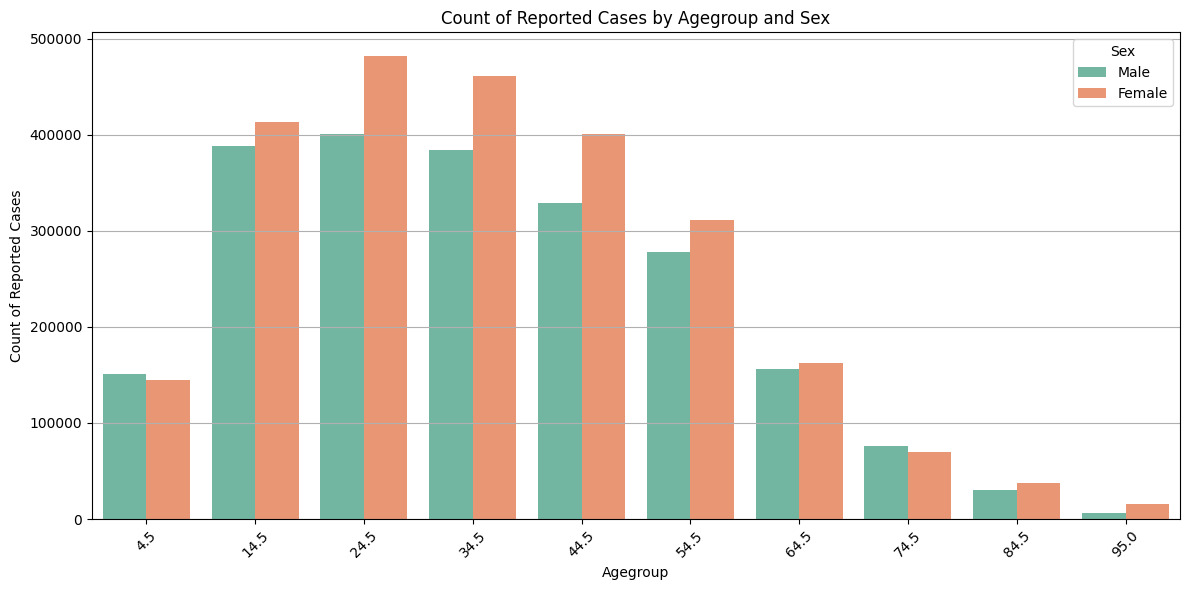

In [1111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming infections_df is already defined and loaded with the updated columns

# Check data types and missing values
print("Data Types:")
print(infections_df[['Agegroup_numerical', 'Sex_numerical', 'total_reported']].dtypes)
print("\nMissing Values:")
print(infections_df[['Agegroup_numerical', 'Sex_numerical', 'total_reported']].isnull().sum())

# Aggregate total reported cases by Agegroup_numerical and Sex_numerical
aggregated_df = infections_df.groupby(['Agegroup_numerical', 'Sex_numerical'])['total_reported'].sum().reset_index()

# Check the structure of aggregated data
print("\nAggregated Data Structure:")
print(aggregated_df.head())

# Check summary statistics of total_reported
print("\nSummary Statistics of total_reported:")
print(aggregated_df['total_reported'].describe())

# Plot a simple countplot to visualize distribution by Agegroup and Sex
plt.figure(figsize=(12, 6))
sns.countplot(x='Agegroup_numerical', hue='Sex_numerical', data=infections_df, palette='Set2')
plt.title('Count of Reported Cases by Agegroup and Sex')
plt.xlabel('Agegroup')
plt.ylabel('Count of Reported Cases')
plt.legend(title='Sex', labels=['Male', 'Female'])
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Everything looks good. Let's create the boxplots to visually understand how COVID-19 cases are distributed across different age groups and sexes. Boxplots are great for this because they show us at a glance where most cases fall within each group, how spread out the data is, and if there are any unusual values that might need closer attention.

C:\Users\Camil\AppData\Local\Temp\ipykernel_4116\3123145134.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, y='total_reported', data=aggregated_df, palette='Set2', ax=ax)
C:\Users\Camil\AppData\Local\Temp\ipykernel_4116\3123145134.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, y='total_reported', data=aggregated_df, palette='Set2', ax=ax)


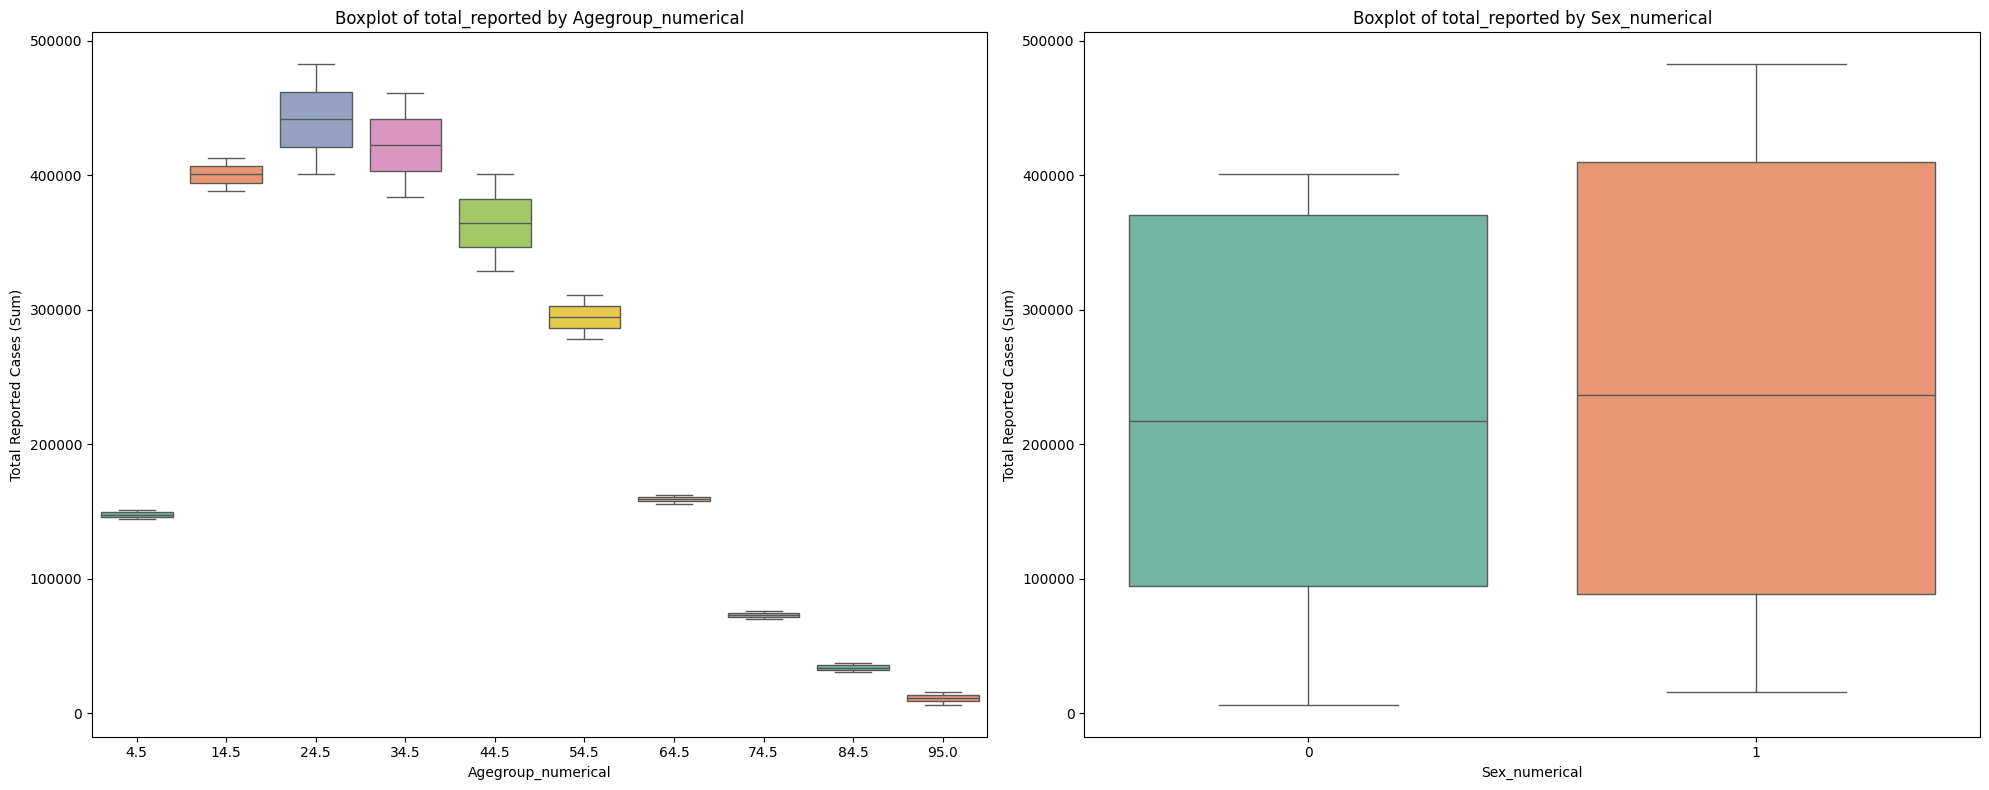

In [1112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'aggregated_df' contains your infection data with columns 'Agegroup_numerical', 'Sex_numerical', 'total_reported'

# List of columns to include in the boxplots
columns_to_plot = ['Agegroup_numerical', 'Sex_numerical']

# Plotting multiple boxplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(20, 8))

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    sns.boxplot(x=column, y='total_reported', data=aggregated_df, palette='Set2', ax=ax)
    ax.set_title(f'Boxplot of total_reported by {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Total Reported Cases (Sum)')

# Adjust layout
plt.tight_layout()
plt.show()


The distribution of reported cases varies significantly across different age groups. For example, some age groups show a wider spread of reported cases (larger IQR), indicating higher variability, while others may have more consistent reporting.

There appears to be some variation in reported cases between sexes, as indicated by differences in the medians and spread (IQR) between categories.



Now that all our values are the way they need to be, we can start visualizing some of the data


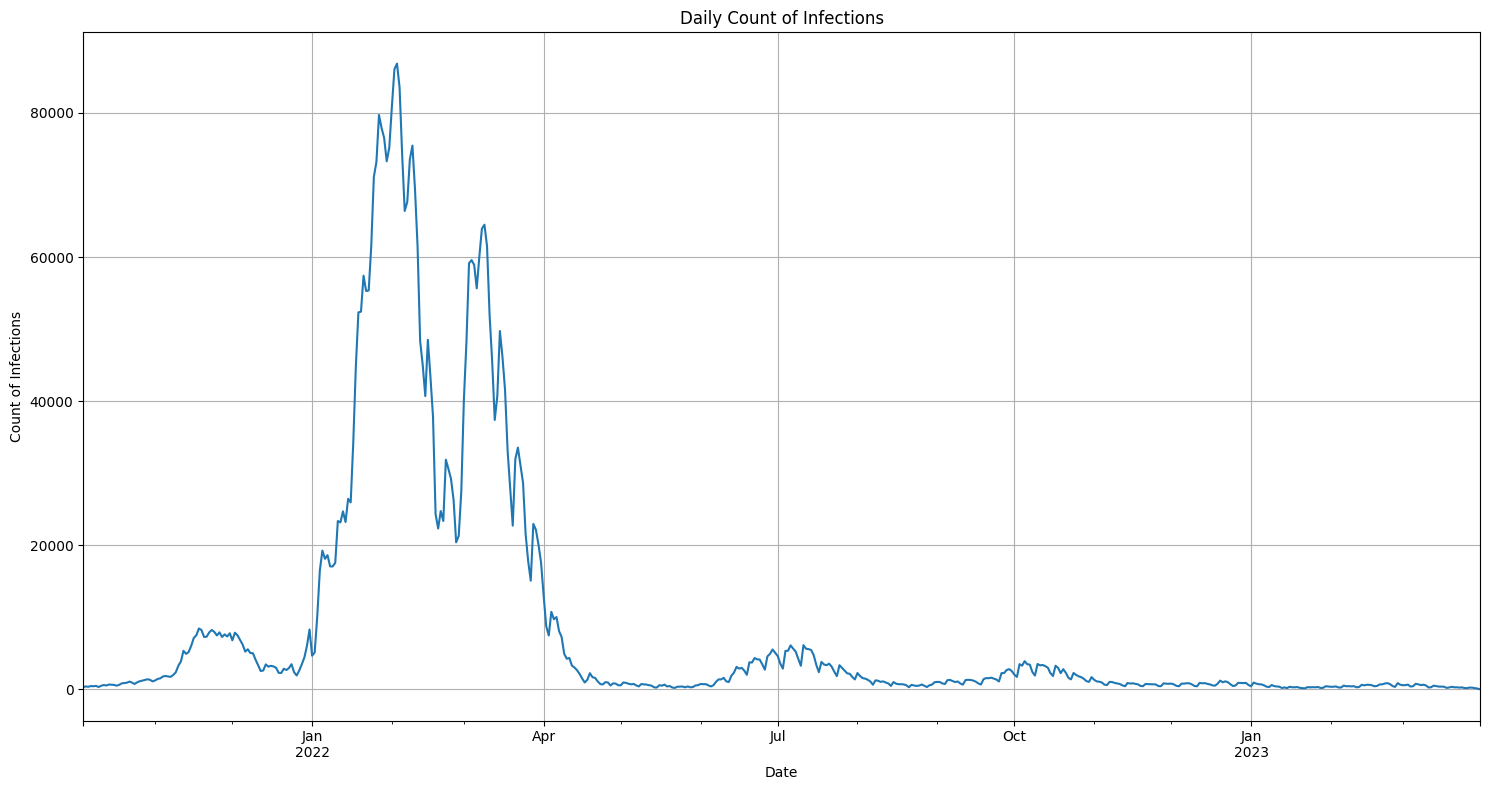

In [1113]:

# Plot showing the daily count of infections over time
plt.figure(figsize=(15, 8))
infections_df['Amount_of_infections_df'] = 1
infections_df['Amount_of_infections_df'].resample('D').sum().plot()
plt.title('Daily Count of Infections')
plt.xlabel('Date')
plt.ylabel('Count of Infections')
plt.grid(True)
plt.tight_layout()
plt.show()


           Agegroup     Sex      Province Deceased  Season  \
Date                                                         
2021-10-04    50-59    Male  Zuid-Holland       No  Autumn   
2021-10-04    10-19    Male  Zuid-Holland       No  Autumn   
2021-10-04    20-29    Male     Groningen       No  Autumn   
2021-10-04    50-59    Male    Overijssel       No  Autumn   
2021-10-04    10-19  Female  Zuid-Holland       No  Autumn   

            Agegroup_numerical  Sex_numerical  total_reported  \
Date                                                            
2021-10-04                54.5              0               1   
2021-10-04                14.5              0               1   
2021-10-04                24.5              0               1   
2021-10-04                54.5              0               1   
2021-10-04                14.5              1               1   

            Amount_of_infections_df  
Date                                 
2021-10-04                       

C:\Users\Camil\AppData\Local\Temp\ipykernel_4116\3319028861.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Province', data=infections_df, order=infections_df['Province'].value_counts().index, palette='viridis', ax=axs[1, 2])
C:\Users\Camil\AppData\Local\Temp\ipykernel_4116\3319028861.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Agegroup', data=infections_df, order=infections_df['Agegroup'].value_counts().index, palette='mako', ax=axs[2, 0])
C:\Users\Camil\AppData\Local\Temp\ipykernel_4116\3319028861.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` f

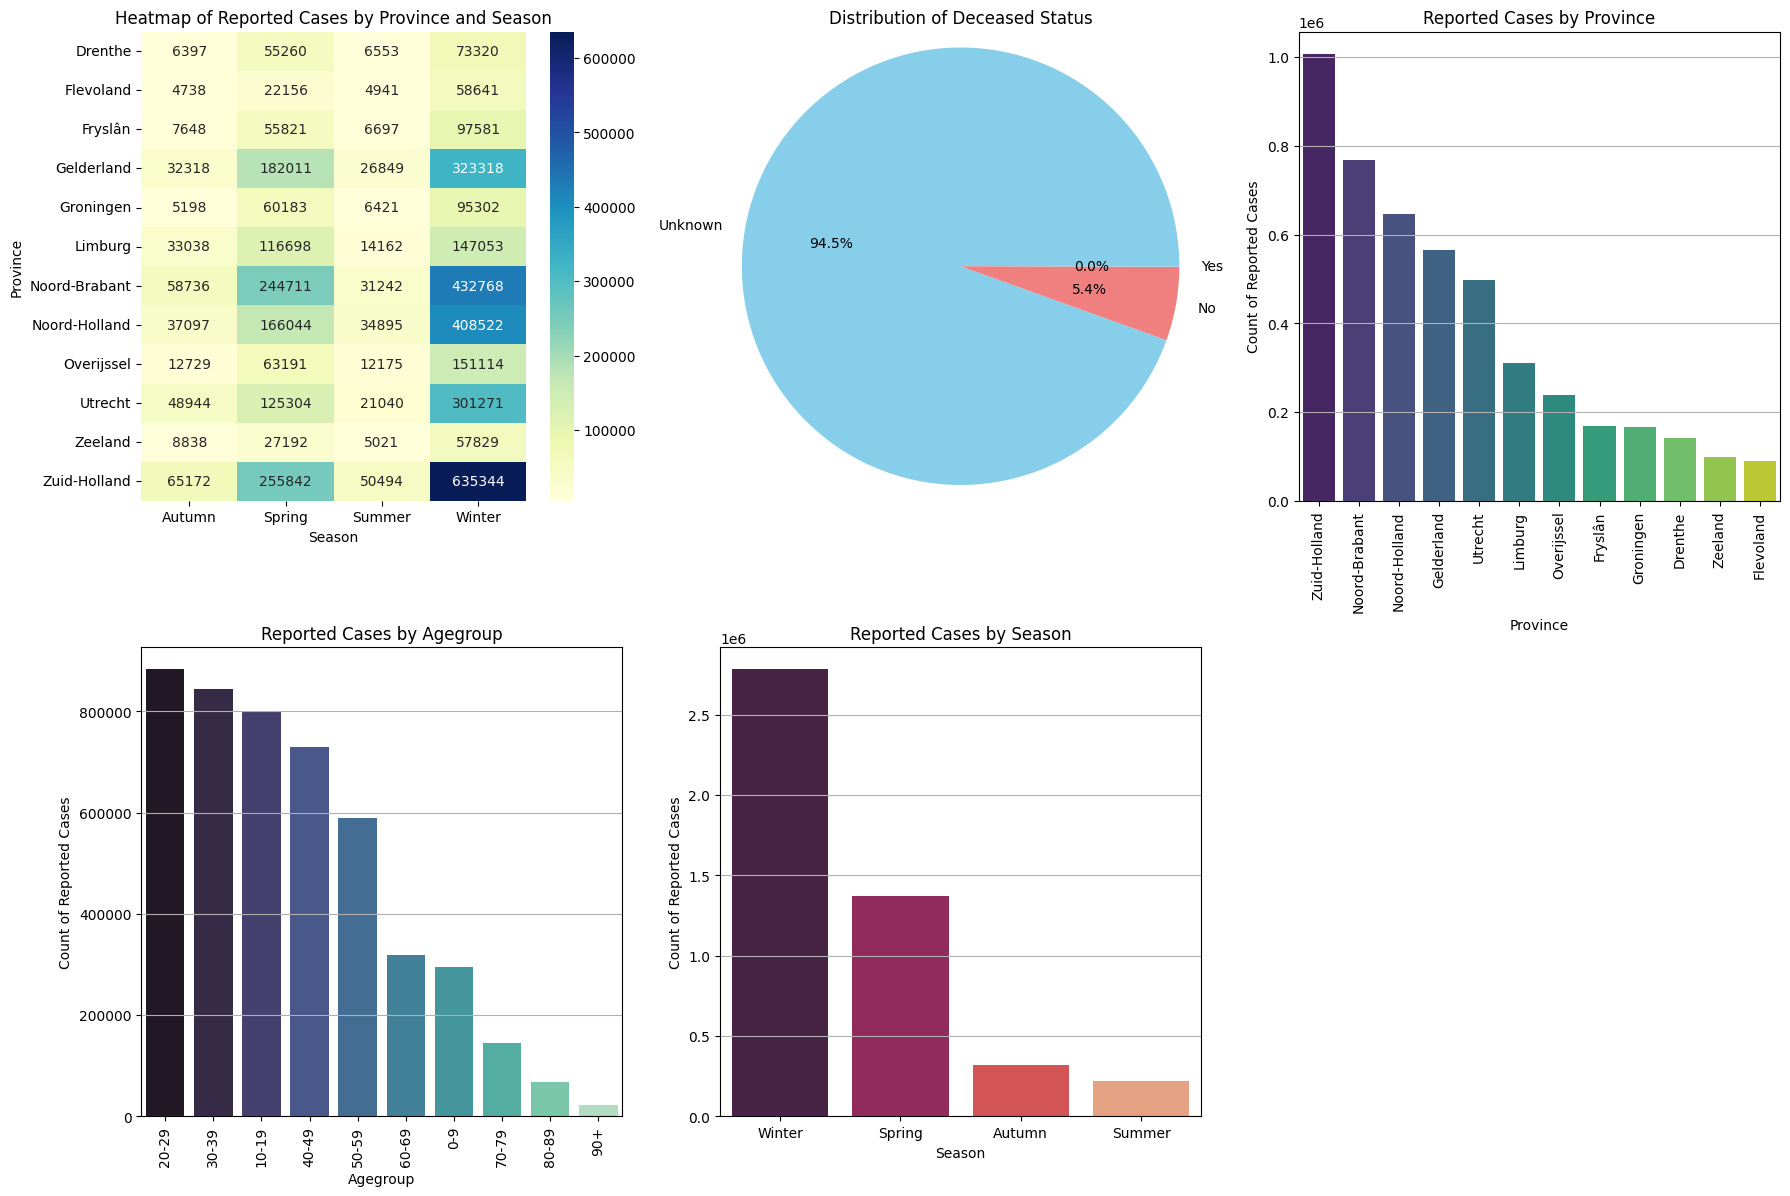

In [1114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check the dataframe
print(infections_df.head())

# Ensure Agegroup_numerical and Sex_numerical are numeric
infections_df['Agegroup_numerical'] = pd.to_numeric(infections_df['Agegroup_numerical'], errors='coerce')
infections_df['Sex_numerical'] = pd.to_numeric(infections_df['Sex_numerical'], errors='coerce')
infections_df['total_reported'] = pd.to_numeric(infections_df['total_reported'], errors='coerce')

# Create subplots with specified layout
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))



# Heatmap for Province and Season distribution
province_season_pivot = infections_df.pivot_table(index='Province', columns='Season', values='total_reported', aggfunc='sum')
sns.heatmap(province_season_pivot, annot=True, cmap='YlGnBu', fmt='.0f', ax=axs[1, 0])
axs[1, 0].set_title('Heatmap of Reported Cases by Province and Season')
axs[1, 0].set_xlabel('Season')
axs[1, 0].set_ylabel('Province')

# Pie chart for deceased status
deceased_counts = infections_df['Deceased'].value_counts()
axs[1, 1].pie(deceased_counts, labels=deceased_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
axs[1, 1].set_title('Distribution of Deceased Status')
axs[1, 1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle


# Count plot for infections per Province
sns.countplot(x='Province', data=infections_df, order=infections_df['Province'].value_counts().index, palette='viridis', ax=axs[1, 2])
axs[1, 2].set_title('Reported Cases by Province')
axs[1, 2].set_xlabel('Province')
axs[1, 2].set_ylabel('Count of Reported Cases')
axs[1, 2].tick_params(axis='x', rotation=90)
axs[1, 2].grid(axis='y')

# Count plot for infections per Agegroup
sns.countplot(x='Agegroup', data=infections_df, order=infections_df['Agegroup'].value_counts().index, palette='mako', ax=axs[2, 0])
axs[2, 0].set_title('Reported Cases by Agegroup')
axs[2, 0].set_xlabel('Agegroup')
axs[2, 0].set_ylabel('Count of Reported Cases')
axs[2, 0].tick_params(axis='x', rotation=90)
axs[2, 0].grid(axis='y')

# Count plot for infections per Season
sns.countplot(x='Season', data=infections_df, order=infections_df['Season'].value_counts().index, palette='rocket', ax=axs[2, 1])
axs[2, 1].set_title('Reported Cases by Season')
axs[2, 1].set_xlabel('Season')
axs[2, 1].set_ylabel('Count of Reported Cases')
axs[2, 1].grid(axis='y')

# remove the top 3 empty plots
fig.delaxes(axs[0, 0])
fig.delaxes(axs[0, 1])
fig.delaxes(axs[0, 2])
fig.delaxes(axs[2, 2])

# Adjust layout and show plot
plt.tight_layout()
plt.show()


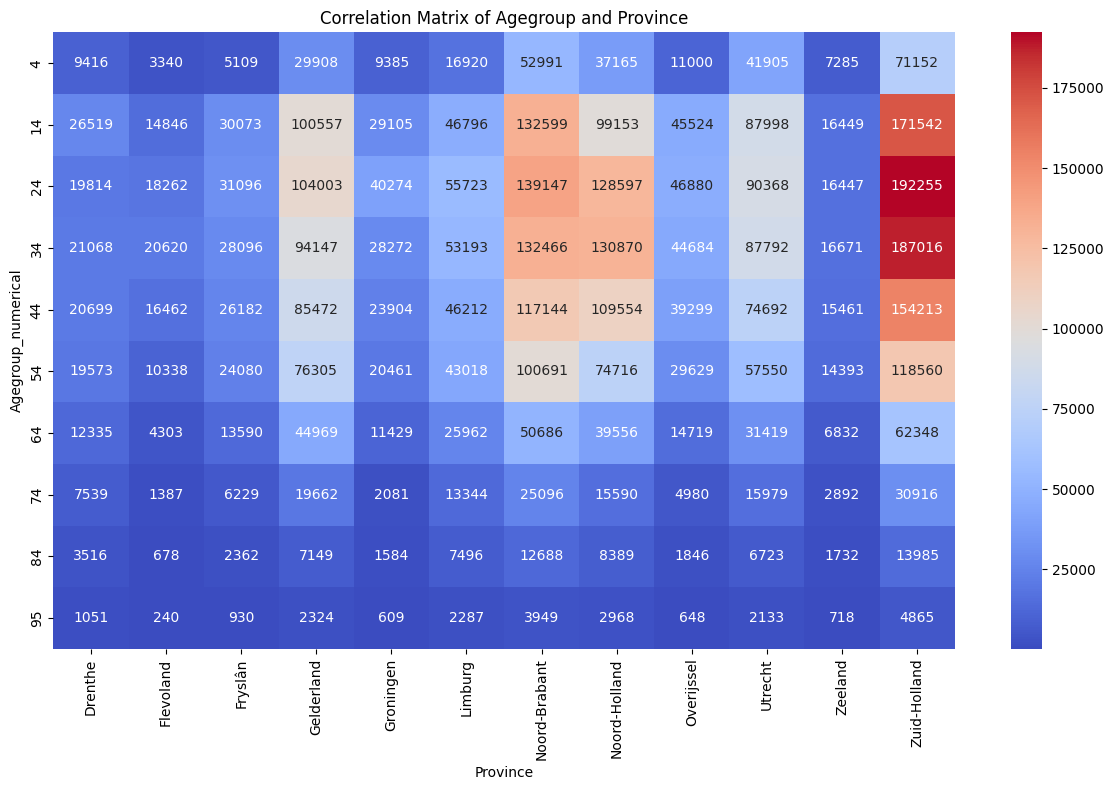

In [1115]:
# create a pivot table
infections_df['Amount_of_infections_df'] = 1
infections_df['Amount_of_infections_df'] = infections_df['Amount_of_infections_df'].astype(int)
infections_df['Agegroup_numerical'] = infections_df['Agegroup_numerical'].astype(int)
infections_df
pivot_table_agegroup_province = infections_df.pivot_table(index='Agegroup_numerical', columns='Province', values='Amount_of_infections_df', aggfunc='sum')
pivot_table_agegroup_province
# now make the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_agegroup_province, annot=True, cmap='coolwarm', fmt='.0f')
plt.title('Correlation Matrix of Agegroup and Province')
plt.tight_layout()


In [1116]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap

# Coordinates of Dutch provinces
province_coords = {
    "Drenthe": (52.9474, 6.6238),
    "Flevoland": (52.527978, 5.595350),
    "Fryslân": (53.1642, 5.7818),
    "Gelderland": (52.0459, 5.8716),
    "Groningen": (53.2194, 6.5665),
    "Limburg": (51.2194, 5.9398),
    "Noord-Brabant": (51.4827, 5.2328),
    "Noord-Holland": (52.5200, 4.7500),
    "Overijssel": (52.4451, 6.5017),
    "Utrecht": (52.0911, 5.1222),
    "Zeeland": (51.4416, 3.7678),
    "Zuid-Holland": (51.9200, 4.4800)
}

# Add Latitude and Longitude columns based on the province_coords dictionary
infections_by_province['Latitude'] = infections_by_province['Province'].map(lambda p: province_coords[p][0] if p in province_coords else None)
infections_by_province['Longitude'] = infections_by_province['Province'].map(lambda p: province_coords[p][1] if p in province_coords else None)

# Display the updated dataframe
print("\nInfections by Province with Coordinates:")
print(infections_by_province)


# Create a map centered on the Netherlands
map = folium.Map(location=[52.1326, 5.2913], zoom_start=7)

# Add a heatmap to the map
HeatMap(data=infections_by_province[['Latitude', 'Longitude', 'Infections']], radius=60).add_to(map)

# Save and display the map
map.save('infections_heatmap.html')
map



Infections by Province with Coordinates:
         Province  Infections   Latitude  Longitude
0         Drenthe      141530  52.947400    6.62380
1       Flevoland       90476  52.527978    5.59535
2         Fryslân      167747  53.164200    5.78180
3      Gelderland      564496  52.045900    5.87160
4       Groningen      167104  53.219400    6.56650
5         Limburg      310951  51.219400    5.93980
6   Noord-Brabant      767457  51.482700    5.23280
7   Noord-Holland      646558  52.520000    4.75000
8      Overijssel      239209  52.445100    6.50170
9         Utrecht      496559  52.091100    5.12220
10        Zeeland       98880  51.441600    3.76780
11   Zuid-Holland     1006852  51.920000    4.48000


I have tried modelling with the dataset but 5 million rows (infections) is undoable, so i'll be taking somewhere around 20.000 random infections and seeing if the visualisation / correlation results will be the same.

If so ill be modelling with a smaller dataframe (randominfections_df).

Since the data is already cleaned and processed i can just take the samples from the infections_df.


Before i noted i'll be using around 20.000 samples, but i'll increase this to 200.000 since it isn't wide enough.

In [1117]:
# take 20.0000 random samples for the infections_df
randominfections_df = infections_df.sample(200000)
randominfections_df


,Agegroup,Sex,Province,Deceased,Season,Agegroup_numerical,Sex_numerical,total_reported,Amount_of_infections_df
Date,,,,,,,,,
2022-02-01,70-79,Female,Utrecht,Unknown,Winter,74,1,1,1
2022-02-02,10-19,Male,Drenthe,Unknown,Winter,14,0,1,1
2022-03-09,40-49,Male,Noord-Brabant,Unknown,Spring,44,0,1,1
2022-01-02,20-29,Male,Noord-Holland,Unknown,Winter,24,0,1,1
2022-03-26,30-39,Male,Fryslân,Unknown,Spring,34,0,1,1
...,...,...,...,...,...,...,...,...,...
2022-03-14,70-79,Male,Noord-Holland,No,Spring,74,0,1,1
2022-01-11,40-49,Female,Zuid-Holland,Unknown,Winter,44,1,1,1
2022-01-27,30-39,Female,Zuid-Holland,Unknown,Winter,34,1,1,1


C:\Users\Camil\AppData\Local\Temp\ipykernel_4116\1861542277.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Province', data=randominfections_df, order=randominfections_df['Province'].value_counts().index, palette='viridis', ax=axs[1, 2])
C:\Users\Camil\AppData\Local\Temp\ipykernel_4116\1861542277.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Agegroup', data=randominfections_df, order=randominfections_df['Agegroup'].value_counts().index, palette='mako', ax=axs[2, 0])
C:\Users\Camil\AppData\Local\Temp\ipykernel_4116\1861542277.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` 

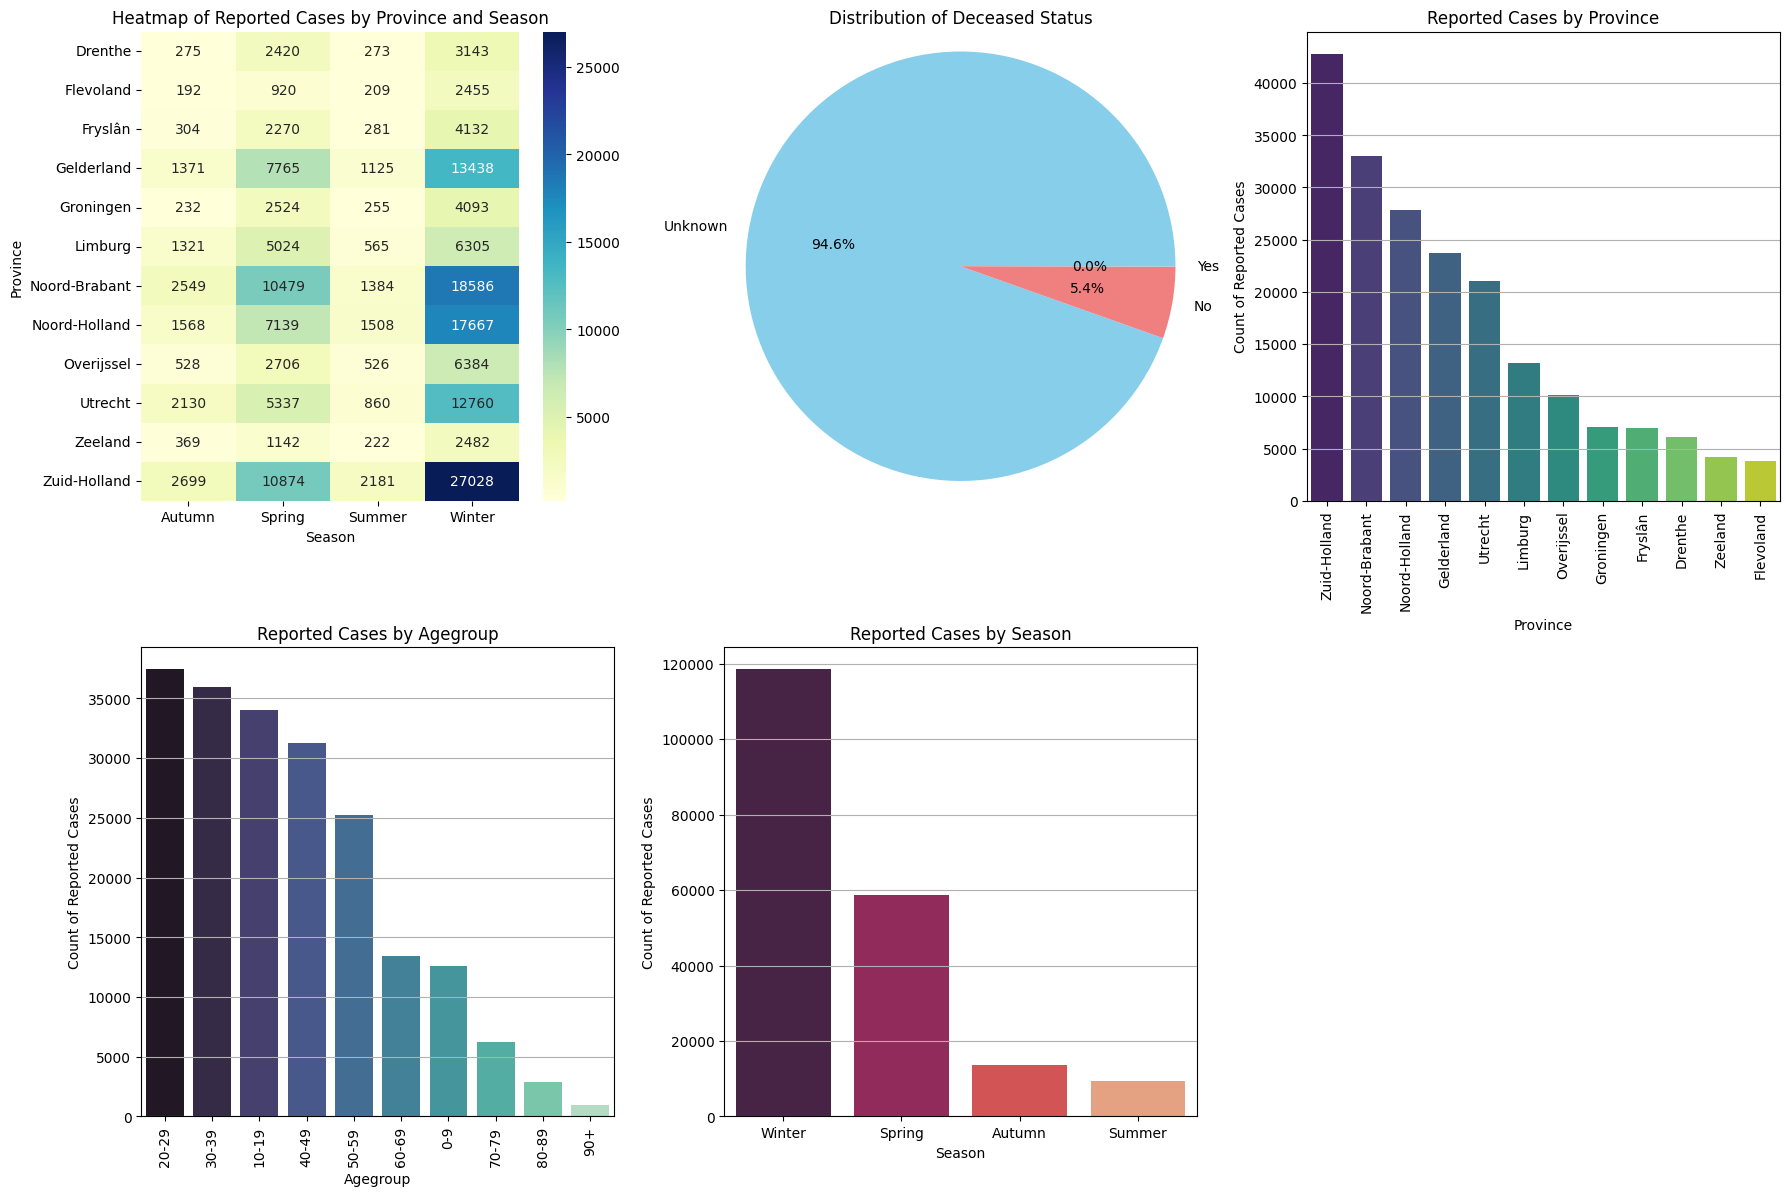

In [1118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure Agegroup_numerical and Sex_numerical are numeric
randominfections_df['Agegroup_numerical'] = pd.to_numeric(randominfections_df['Agegroup_numerical'], errors='coerce')
randominfections_df['Sex_numerical'] = pd.to_numeric(randominfections_df['Sex_numerical'], errors='coerce')
randominfections_df['total_reported'] = pd.to_numeric(randominfections_df['total_reported'], errors='coerce')

# Create subplots with specified layout
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))



# Heatmap for Province and Season distribution
province_season_pivot = randominfections_df.pivot_table(index='Province', columns='Season', values='total_reported', aggfunc='sum')
sns.heatmap(province_season_pivot, annot=True, cmap='YlGnBu', fmt='.0f', ax=axs[1, 0])
axs[1, 0].set_title('Heatmap of Reported Cases by Province and Season')
axs[1, 0].set_xlabel('Season')
axs[1, 0].set_ylabel('Province')

# Pie chart for deceased status
deceased_counts = randominfections_df['Deceased'].value_counts()
axs[1, 1].pie(deceased_counts, labels=deceased_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
axs[1, 1].set_title('Distribution of Deceased Status')
axs[1, 1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle


# Count plot for infections per Province
sns.countplot(x='Province', data=randominfections_df, order=randominfections_df['Province'].value_counts().index, palette='viridis', ax=axs[1, 2])
axs[1, 2].set_title('Reported Cases by Province')
axs[1, 2].set_xlabel('Province')
axs[1, 2].set_ylabel('Count of Reported Cases')
axs[1, 2].tick_params(axis='x', rotation=90)
axs[1, 2].grid(axis='y')

# Count plot for infections per Agegroup
sns.countplot(x='Agegroup', data=randominfections_df, order=randominfections_df['Agegroup'].value_counts().index, palette='mako', ax=axs[2, 0])
axs[2, 0].set_title('Reported Cases by Agegroup')
axs[2, 0].set_xlabel('Agegroup')
axs[2, 0].set_ylabel('Count of Reported Cases')
axs[2, 0].tick_params(axis='x', rotation=90)
axs[2, 0].grid(axis='y')

# Count plot for infections per Season
sns.countplot(x='Season', data=randominfections_df, order=randominfections_df['Season'].value_counts().index, palette='rocket', ax=axs[2, 1])
axs[2, 1].set_title('Reported Cases by Season')
axs[2, 1].set_xlabel('Season')
axs[2, 1].set_ylabel('Count of Reported Cases')
axs[2, 1].grid(axis='y')

# remove the top 3 empty plots
fig.delaxes(axs[0, 0])
fig.delaxes(axs[0, 1])
fig.delaxes(axs[0, 2])
fig.delaxes(axs[2, 2])

# Adjust layout and show plot
plt.tight_layout()
plt.show()


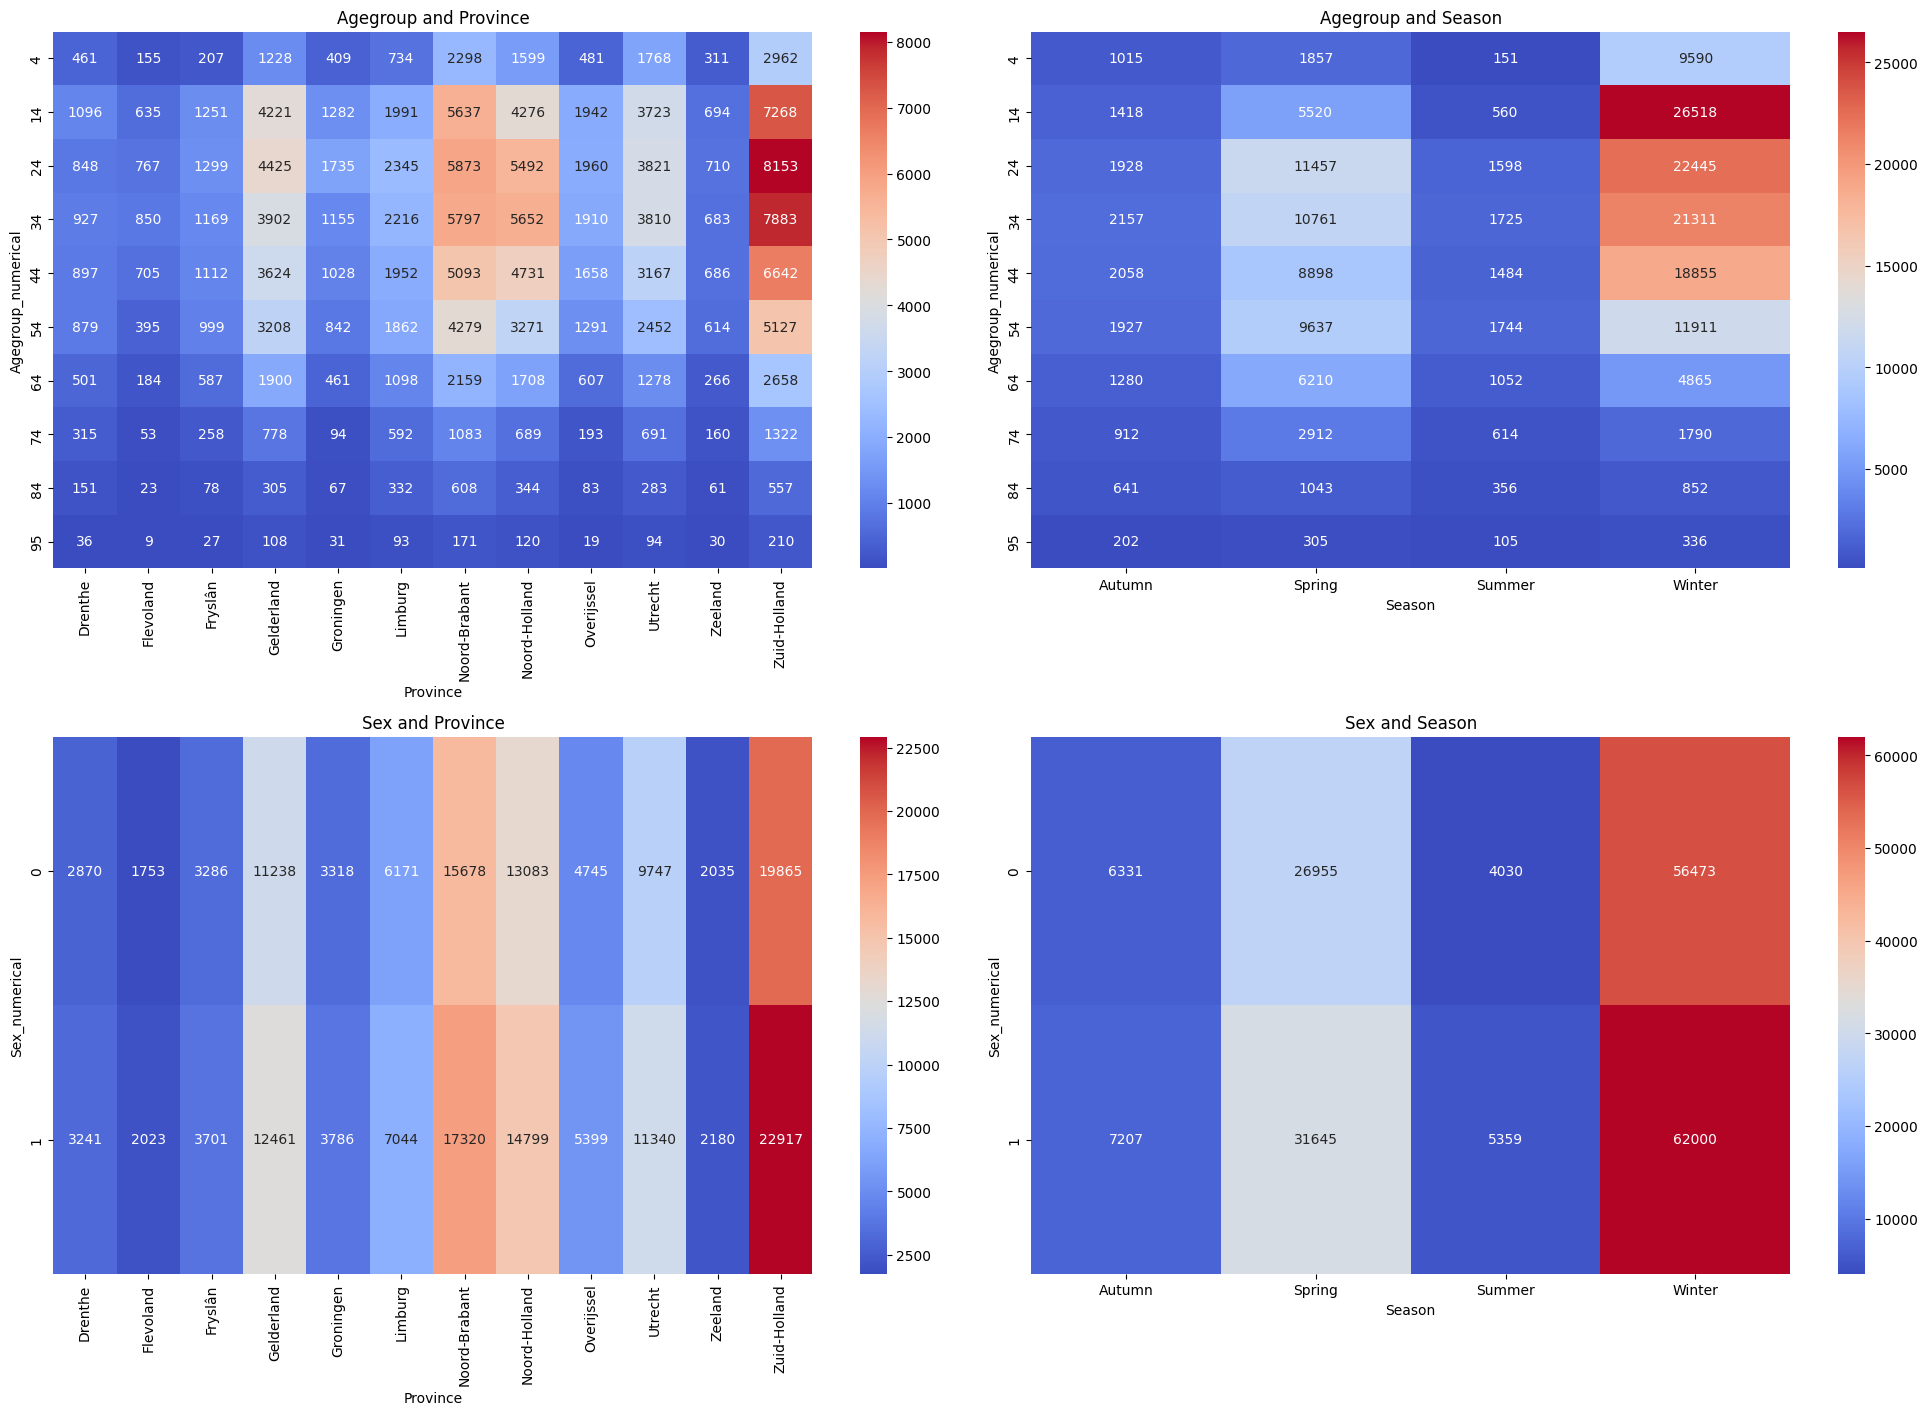

In [1119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
# install labelencoder
# pip install -U scikit-learn

# Assuming randominfections_df is already defined and preprocessed

# Create a pivot table for Agegroup and Province
pivot_table_agegroup_province = randominfections_df.pivot_table(index='Agegroup_numerical', columns='Province', values='Amount_of_infections_df', aggfunc='sum')

# Create a pivot table for Agegroup and Season
pivot_table_agegroup_season = randominfections_df.pivot_table(index='Agegroup_numerical', columns='Season', values='Amount_of_infections_df', aggfunc='sum')

# Create a pivot table for Sex and Province
pivot_table_sex_province = randominfections_df.pivot_table(index='Sex_numerical', columns='Province', values='Amount_of_infections_df', aggfunc='sum')

# Create a pivot table for Sex and Season
pivot_table_sex_season = randominfections_df.pivot_table(index='Sex_numerical', columns='Season', values='Amount_of_infections_df', aggfunc='sum')

# Encode categorical variables
label_encoder_province = LabelEncoder()
label_encoder_season = LabelEncoder()

randominfections_df['Province_encoded'] = label_encoder_province.fit_transform(randominfections_df['Province'])
randominfections_df['Season_encoded'] = label_encoder_season.fit_transform(randominfections_df['Season'])

# Select relevant features for the correlation matrix
features = ['Agegroup_numerical', 'Sex_numerical', 'Province_encoded', 'Season_encoded', 'Amount_of_infections_df']

# Calculate the correlation matrix
correlation_matrix = randominfections_df[features].corr()

# Plotting all the heatmaps in subplots
fig, axs = plt.subplots(3, 2, figsize=(20, 20))

sns.heatmap(pivot_table_agegroup_province, annot=True, cmap='coolwarm', fmt='.0f', ax=axs[0, 0])
axs[0, 0].set_title('Agegroup and Province')

sns.heatmap(pivot_table_agegroup_season, annot=True, cmap='coolwarm', fmt='.0f', ax=axs[0, 1])
axs[0, 1].set_title('Agegroup and Season')

sns.heatmap(pivot_table_sex_province, annot=True, cmap='coolwarm', fmt='.0f', ax=axs[1, 0])
axs[1, 0].set_title('Sex and Province')

sns.heatmap(pivot_table_sex_season, annot=True, cmap='coolwarm', fmt='.0f', ax=axs[1, 1])
axs[1, 1].set_title('Sex and Season')


# Remove the unused subplot
fig.delaxes(axs[2, 1])
fig.delaxes(axs[2, 0])

plt.tight_layout()
plt.show()


In [1120]:
randominfections_df.head()

,Agegroup,Sex,Province,Deceased,Season,Agegroup_numerical,Sex_numerical,total_reported,Amount_of_infections_df,Province_encoded,Season_encoded
Date,,,,,,,,,,,
2022-02-01,70-79,Female,Utrecht,Unknown,Winter,74,1,1,1,9,3
2022-02-02,10-19,Male,Drenthe,Unknown,Winter,14,0,1,1,0,3
2022-03-09,40-49,Male,Noord-Brabant,Unknown,Spring,44,0,1,1,6,1
2022-01-02,20-29,Male,Noord-Holland,Unknown,Winter,24,0,1,1,7,3
2022-03-26,30-39,Male,Fryslân,Unknown,Spring,34,0,1,1,2,1


In [1121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming infections_df is already defined and preprocessed

# Print a summary of the dataframe
print("Data Summary:")
print(randominfections_df.describe())


# Print the aggregated data to ensure correctness
print("Aggregated Data Summary:")
print(aggregated_df.describe())

# Encode categorical variables
label_encoder_province = LabelEncoder()
label_encoder_season = LabelEncoder()

aggregated_df['Province_encoded'] = label_encoder_province.fit_transform(aggregated_df['Province'])
aggregated_df['Season_encoded'] = label_encoder_season.fit_transform(aggregated_df['Season'])

# Select relevant features for the correlation matrix
features = ['Agegroup_numerical', 'Sex_numerical', 'Province_encoded', 'Season_encoded', 'Amount_of_infections_df']

# Calculate the correlation matrix
correlation_matrix = aggregated_df[features].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Agegroup, Sex, Province, Season, and Count of Infections')
plt.tight_layout()
plt.show()


Data Summary:
       Agegroup_numerical  Sex_numerical  total_reported  \
count       200000.000000  200000.000000        200000.0   
mean            35.190490       0.531055             1.0   
std             19.290351       0.499036             0.0   
min              4.000000       0.000000             1.0   
25%             24.000000       0.000000             1.0   
50%             34.000000       1.000000             1.0   
75%             44.000000       1.000000             1.0   
max             95.000000       1.000000             1.0   

       Amount_of_infections_df  Province_encoded  Season_encoded  
count                 200000.0     200000.000000   200000.000000  
mean                       1.0          6.800935        2.163985  
std                        0.0          3.120938        1.062657  
min                        1.0          0.000000        0.000000  
25%                        1.0          5.000000        1.000000  
50%                        1.0          7.0

KeyError: 'Province'

##  Modelling


### Why Clustering?
Clustering is a fundamental unsupervised learning technique that groups similar data points together based on their features. This approach is particularly valuable for exploratory data analysis, where the objective is to uncover hidden patterns and structures in the data without relying on predefined labels. Here’s a deeper dive into why clustering is suited for this task:

1.	Unsupervised Learning: Since clustering doesn’t require labeled data, it’s ideal for scenarios where outbreak labels are not well-defined initially. This allows for an exploratory approach to understand the data’s natural groupings.

2.	Pattern Recognition: By identifying regions with similar outbreak patterns, clustering can help in recognizing and categorizing different outbreak dynamics, which is crucial for targeted public health interventions.

3.	Anomaly Detection: Clusters can highlight outliers or anomalies that may indicate emerging outbreaks or regions requiring closer surveillance.




## What Models and why?

When analyzing COVID-19 outbreak patterns, the choice of clustering models—K-means, DBSCAN, and hierarchical clustering—offers unique advantages tailored to the specific nuances of the pandemic.

Also all of these models can use non numeric values, and some of my features contain non numeric values.
### K-means Clustering
First up is K-means clustering. Think of it as sorting your collection of colored marbles into different jars. K-means divides the dataset into K clusters, where each data point belongs to the cluster with the closest mean, or centroid. This model is ideal for identifying clusters of regions with similar COVID-19 outbreak patterns. By pinpointing distinct groupings, you can understand how different areas are experiencing the pandemic in similar ways, which can be crucial for targeted interventions.


K-means clustering is like sorting your data into different groups based on similarities. It partitions the dataset into K clusters, where each data point belongs to the cluster with the nearest mean (centroid). This model is particularly useful for:

Identifying Clusters of Regions with Similar Outbreak Patterns: By grouping regions with similar COVID-19 trends, you can easily identify areas experiencing the pandemic in comparable ways.
Understanding Outbreak Levels and Trends: Distinct groupings can correspond to different levels or trends of outbreaks, helping in understanding how the pandemic evolves in different areas.


### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
Next, we have DBSCAN, or Density-Based Spatial Clustering of Applications with Noise. Imagine walking through a crowded market and noting where people naturally gather and where there are fewer individuals. DBSCAN groups closely packed points and marks points in low-density regions as outliers. This method is particularly effective for detecting spatial clusters and noise in infection rates. It helps identify high-density clusters of infections—potential hotspots—and outliers, which might be emerging outbreaks or data errors.

DBSCAN works like a magnifying glass, highlighting densely packed areas and marking isolated points as outliers. It’s great for:

Detecting Spatial Clusters and Noise: This model excels at identifying clusters of infections that are closely packed, which can indicate potential hotspots.
Highlighting Anomalies: It marks points in low-density regions as outliers, helping to spot potential emerging outbreaks or errors in the data.

### Hierarchical Clustering
Lastly, there's hierarchical clustering. Picture a family tree that shows how small families combine into larger branches. Hierarchical clustering builds a tree of clusters, which can be agglomerative (starting with individual points and merging them) or divisive (starting with one large cluster and splitting it). This model is useful for understanding nested clusters of infections, illustrating how smaller clusters merge into larger ones. It provides a detailed view of how regions group together at different levels of granularity, revealing the hierarchical structure of outbreaks.


Hierarchical clustering builds a tree-like structure (dendrogram) of clusters, offering a detailed view of how data points group together. This model is beneficial for:

Understanding Nested Clusters: It shows how smaller clusters merge into larger ones, providing a multi-level perspective on how infections spread.
Detailed Granularity: The hierarchical nature of this method helps understand the structure of outbreaks at different levels, from small clusters to large groups.
Why These Models Are Good for Analyzing COVID-19 Outbreak Patterns

Exploratory Analysis Without Labels: Since the models work without predefined labels, they are ideal for uncovering natural groupings and patterns in the data.
Targeted Public Health Interventions: By understanding how different regions experience the pandemic, public health officials can design more effective, targeted interventions.
Early Detection of Hotspots and Outliers: These models help in identifying both high-density infection clusters and anomalies, enabling early action to prevent widespread outbreaks.
Hierarchical Understanding: The multi-level insights provided by hierarchical clustering can inform strategies at both local and broader scales

In [ ]:
randominfections_df.shape

(200000, 11)

## Initial Clustering Models

We begin by exploring three prominent clustering algorithms:

### 1. K-means Clustering:

Purpose: Partition the dataset into K clusters based on similarity of COVID-19 outbreak patterns.

Insight: Identify groups of regions with comparable outbreak levels or trends.




In the previous iteration i just used a random k number and after doing research i found out you must choose this carefully so,

First of all i have to determine the number of clusters since this is a crucial step and can significantly impact the interpretation and effectiveness of the clustering results.

There are several ways to do this and i will be using a few common ones to keep it overseeable.

### The Elbow method, Silhouette score, and my own domain understanding.



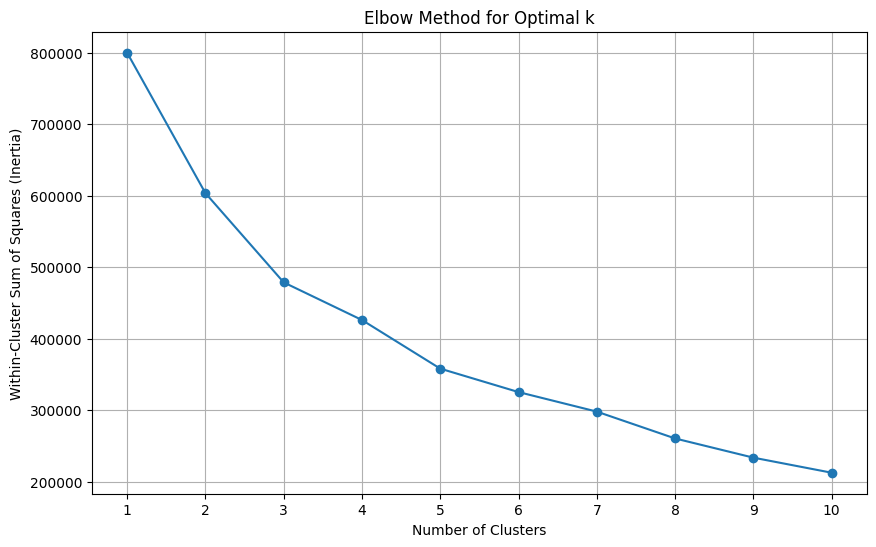

In [ ]:

# Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


The optimal number of clusters is where the decrease in variance begins to slow down, forming an "elbow" shape in the plot.

I want to choose a balance of model complexity and interpretability, which mean fewer clusters and clusters that can capture meaningful patterns.

In this case you could say somewhere between 3 and 5, so i will be choosing 4 as a good balance number.

Lets try some more techniques to see if they match 4.

In [ ]:
print("Shape of X_scaled:", X_scaled.shape)


Shape of X_scaled: (200000, 5)


I've tried collecting the silhouette score based on the random samples (200.000) but this never stops loading, so ill be trying to use 1% of the data to see if it works.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Example: Selecting 1% of the data randomly
subset_size = int(0.1 * X_scaled.shape[0])  # 10% of the total number of samples

# Randomly select subset indices
subset_indices = np.random.choice(X_scaled.shape[0], subset_size, replace=False)

# Create subset of X_scaled
X_subset = X_scaled[subset_indices]

# Example clustering with KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X_subset)

# Compute silhouette score for the subset
silhouette_avg = silhouette_score(X_subset, cluster_labels)

print(f"Silhouette score for the subset: {silhouette_avg}")


Silhouette score for the subset: 0.2567981366996725


a score of 0.29 seems rather unusual since the other method gave 4... lets visualize it.

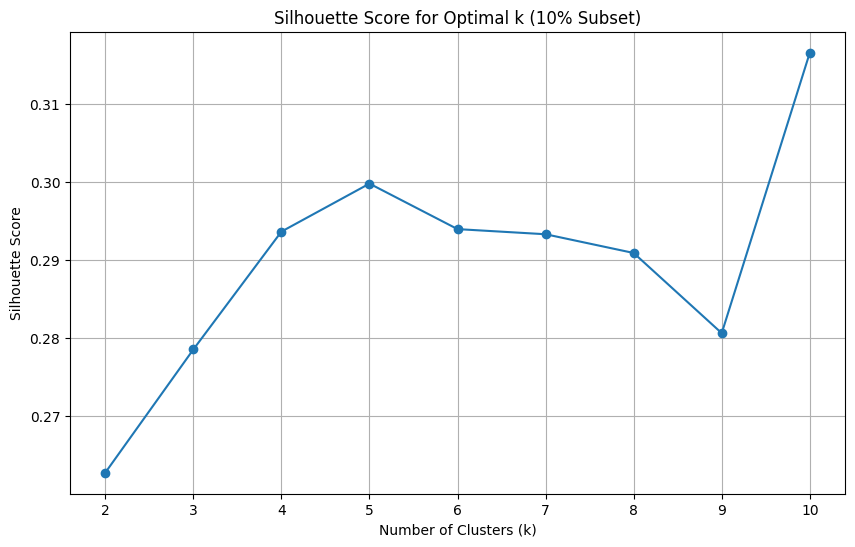

Optimal number of clusters (k) for 10% subset: 10


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Example: Selecting 10% of the data randomly
subset_size = int(0.1 * X_scaled.shape[0])  # 10% of the total number of samples

# Randomly select subset indices
subset_indices = np.random.choice(X_scaled.shape[0], subset_size, replace=False)

# Create subset of X_scaled
X_subset = X_scaled[subset_indices]

# Compute silhouette scores for different values of k
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_subset)
    silhouette_avg = silhouette_score(X_subset, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k (10% Subset)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

# Find the optimal k based on the highest silhouette score
optimal_k = np.argmax(silhouette_scores) + 2  # +2 because range starts from 2
print(f"Optimal number of clusters (k) for 10% subset: {optimal_k}")


Thats more like it. 

The silhouette score measures how similar each point is to its own cluster compared to other clusters. A higher silhouette score indicates that the data point is well-matched to its own cluster and poorly matched to neighboring clusters.

So we would be looking for the peak score, which in this case is 4 and this is equal to the elbow method.

Now we can start the modelling for Kmeans

In [ ]:
randominfections_df.head

<bound method NDFrame.head of            Agegroup     Sex      Province Deceased  Season  \
Date                                                         
2022-01-23    20-29  Female    Gelderland  Unknown  Winter   
2022-11-06    60-69  Female     Flevoland  Unknown  Autumn   
2022-01-05    70-79    Male       Fryslân  Unknown  Winter   
2021-11-17    10-19  Female       Utrecht  Unknown  Autumn   
2022-01-25    20-29  Female  Zuid-Holland  Unknown  Winter   
...             ...     ...           ...      ...     ...   
2022-03-10    40-49    Male       Fryslân  Unknown  Spring   
2022-02-02    10-19  Female  Zuid-Holland  Unknown  Winter   
2022-01-28    10-19    Male  Zuid-Holland  Unknown  Winter   
2022-02-15      0-9  Female       Utrecht  Unknown  Winter   
2022-02-15    10-19  Female  Zuid-Holland  Unknown  Winter   

            Agegroup_numerical  Sex_numerical  total_reported  \
Date                                                            
2022-01-23                  24   

### 2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise):


Purpose: Detect spatial clusters of infections and potential outliers (emerging outbreaks or data anomalies).

Insight: Highlight high-density clusters (hotspots) and areas with unusual infection rates.


### 3. Hierarchical Clustering:

Purpose: Construct a dendrogram to show nested clusters of infections.

Insight: Reveal hierarchical structures in outbreak patterns, from local clusters to broader regional patterns.